# Intro to Regression with Neural Networks in Tensorflow
* Making prediction from the relationship between the dependent and independent variables

In [1]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

2022-12-14 17:03:26.614280: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-14 17:03:26.614315: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-14 17:03:28.043707: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-14 17:03:28.043795: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-14 17:03:28.043807: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

2.11.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

        #creating some data
    
#creating Features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#create Labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])


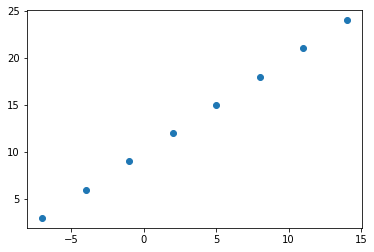

In [3]:
#visualize it
plt.scatter(X,y)

In [4]:
#relstioship
X+10
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output shapes

shapes varies depending n the problem
* problem like housing with features like nbed,utilities and garage as features will require a shape of 3
[bed,utility,garage]
Shape=[3]


In [5]:
#create  a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

2022-12-08 16:18:55.300747: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-08 16:18:55.300793: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-08 16:18:55.300828: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mylar-pc): /proc/driver/nvidia/version does not exist


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape,output_shape

((8,), (8,))

In [7]:
#turn our numpy array into tensors
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# steps in Modeling in Tensorflow
* Create  a model - define  the input and output layers,as well as the hidden layers of a deep learning model

>sequential

>functional


* Compile a model- 

>define the loss function (in other words , the functio which tells our model how wrong it is) and 

>the optimizer (tells our model how to improve the patterns its learning) and

>evaluate metrics (what we  can use to interpret the performance of our model)

* Fitting a model- letting the model try  to find patterns between  X & y( features and labels)

              
#Fit The model
model.fit(x=X,
          y=y,
          epochs=30,
          shuffle=True,
          )

NameError: name 'model' is not defined

#check out X and y
X,y

 try predict
y_pred=model.predict([6.0,7.0,5.0,17.0])
y_pred

# Improving on model

 We can improve our model by altering the steps we took to create a model.
1. **create amodel** - here we might add more layers ,increase the numberof hidden units (all called neurons) within each of the hidden layers,change the activation fucntions of each layer.
2. **Compiling a model** here we might change the optimizeation functions or perhaps the learning rate of the optimization functions.
3. **Fitting a model** - here we might fit a model more epochs (leave it training for longer)or on more data(giving the model examples to learn from

* **Note !**

**Hyperperimeter** is like a dial in the neural network that can be adjusted to see how it improves, where as the perimeter is usually the patterns and neural

In [ ]:
# Hyperimeter

In [ ]:

#Trying   crete the model again

#create the model 
model = tf.keras.Sequential([
    Dense(units=100,input_shape=(1,),activation="relu"),
    Dense(units=50,activation="relu"),
    Dense(units=1)
    
])

# compile the model
model.compile(loss="mae",
              optimizer=tf.optimizers.Adam(learning_rate=0.01),#SGD() , ,
              metrics=['mae']

)


#Fit the model
model.fit(X,
         y,
         epochs=100)

In [ ]:
y_pred=model.predict([17.0,12.0,6.0,5.0,100.0,1.0])
y_pred

In [ ]:
model.summary()

## over fitting 
learning th patterns in the traing ning data too well
 we dont evalutae our model bases on the metrics on thre training data but te metrics on the data not seen before

##some changes we did to improve the model
* Adding a new  layer
*increase the number of hidden units
*change activation functions
*change the optimization
*change learning rate ###most important hyperperemeter change of many neuron network
*Fiting in more data sets

# EVALUATING  A MODEL

**IN PRACTICE , A TIPICAL WORK FLOW WILL BE**
```
Bulid A Model -> Fit it -> Evaluate it->tweak a model->fit it->evaluate it->tweak model -> fit it ->evalute it ... ```

# Note
* When Building a medl you have :experiment, experiment, experiment.
* When it comes to evaluating:visualize, visualize, visualize

 **Visualize:**
 
 * **The Data**- what data are we working with ? what does it look like?
 * **The model itself** What does our model look like?
 * **The training of a model** - how long does a model perform while it  learns
 * **The prediction of the model**- how do hte prediction of a model line up against the ground truth (acual)
 

# Next Dataset

In [4]:
X=tf.range(-100,100,5)
X

2022-12-14 13:48:55.352042: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-14 13:48:55.352687: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-14 13:48:55.352774: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mylar-pc): /proc/driver/nvidia/version does not exist


<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
        -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
         10,   15,   20,   25,   30,   35,   40,   45,   50,   55,   60,
         65,   70,   75,   80,   85,   90,   95], dtype=int32)>

In [5]:
y=X+10
y

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-90, -85, -80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30,
       -25, -20, -15, -10,  -5,   0,   5,  10,  15,  20,  25,  30,  35,
        40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100,
       105], dtype=int32)>

 # The 3 set
 * **Training dataset-70-80%:** ThE model learns from this data 
 * **Validation set- 10-15%** Model gets tuned on this dataset.Testing  on  how the teak affected the model on this data set
 * **Testing dataset- 10-15%**-gets evaluated o this data to test what it has learned.
 
 
 **aim**
 we aim for generalisation ofthe model.
 Being able to perfom well on dT it hasnt seen before

In [5]:
len(X)

40

In [6]:
#Split the data into train and test
X_train = X[:30] #first 40 are traing samples 
y_train = y[:30]

X_test = X[30:] #last 10 are testing samples
y_test = y[30:]
len(X_test), len(y_test)

(10, 10)

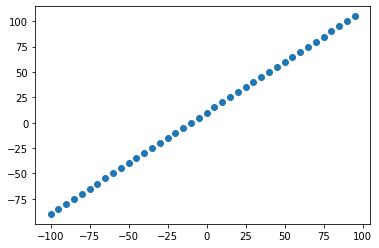

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

## visualising  the data
Now we've got our data in training and testing sets... lets visualize it again


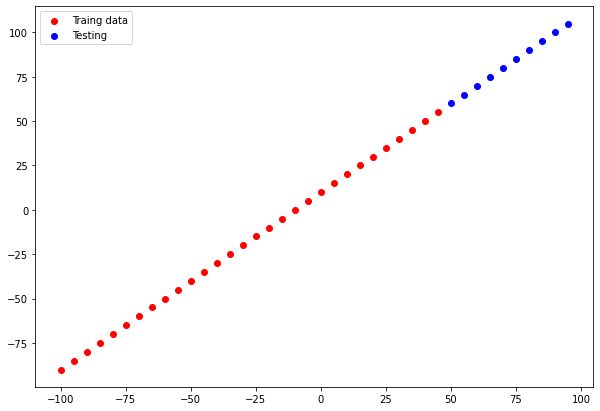

In [8]:
plt.figure(figsize=(10,7))

#plot training data in blue
plt.scatter(X_train,y_train, c="r",label="Traing data")

#plottest data in Green
plt.scatter(X_test,y_test, c='b',label="Testing")
#show a legend
plt.legend();

In [9]:
X_train[:100]

<tf.Tensor: shape=(30,), dtype=int32, numpy=
array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
        -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
         10,   15,   20,   25,   30,   35,   40,   45], dtype=int32)>

In [10]:
X_train.ndim,X_train.shape,tf.size(X_train)

(1, TensorShape([30]), <tf.Tensor: shape=(), dtype=int32, numpy=30>)

In [9]:
#bulding the neursl network for the data
# Build model
# tf.random.set_seed(42)
model=tf.keras.Sequential([
    Dense(units=10,input_shape=(1,)),
    Dense(units=1,name='output_layer')
    
],name="model_0")


#compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #Adam(lr=0.01),
              metrics=["mae"]
)




In [10]:
#fit model
model.fit(X_train,
          y_train,
          epochs=100,
          verbose=0
)


# Model summary

In [13]:
#visualize model
model.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Dense** means a **fully connected layer**

* Total params - total number of parameters in the model.
* Trainable parameters- these are the parameters (patterns) the model can update as it trains.
* Non-trainable params- these parameters arean't updated  during training (this is typical when you bring in already learn patterns or parameters from the other models during **transfer learning**  


**Reasource** For more indepth overview of parameter within a layer, check out MIT's introduction to deep learning vidoe.

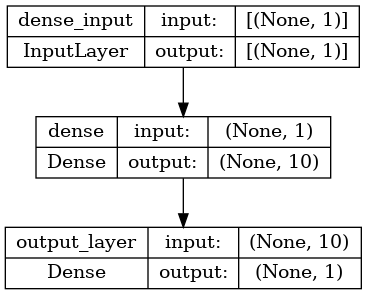

In [14]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

# Visualizeour model predictions

To visualize predictions , it's a god idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred(ground truth versus your model

In [11]:
#Make Some Prediction
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 95ms/step


array([[29.153252],
       [31.981058],
       [34.80886 ],
       [37.636665],
       [40.46447 ],
       [43.29228 ],
       [46.120087],
       [48.94789 ],
       [51.7757  ],
       [54.603508]], dtype=float32)

In [12]:
#Let's create a plotting function
def plot_pred(train_data=X_train,
              train_labels=y_train,
              test_data=X_test,
              test_labels=y_test,
              predictions=y_pred):
    """
    Plot training data,test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10,7))
    #plot the traing data in blue
    plt.scatter(train_data,train_labels,c='b',label="Training data")
    #plot testing data in green
    plt.scatter(test_data,test_labels,c='g',label="Testing data")
    # Plot model's  predictions in red
    plt.scatter(test_data,predictions, c='r',label='Predictions')
    #show the legends
    plt.legend();

**Note:** if you  feel like you're going to use some kind of functionality in the future , its a good idea to turn it into a function 

# Plotting function 

In [13]:
#Let's create a plotting function
def plot_pred(train_data=X_train,
              train_labels=y_train,
              test_data=X_test,
              test_labels=y_test,
              predictions=y_pred):
    """
    Plot training data,test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10,7))
    #plot the traing data in blue
    plt.scatter(train_data,train_labels,c='b',label="Training data")
    #plot testing data in green
    plt.scatter(test_data,test_labels,c='g',label="Testing data")
    # Plot model's  predictions in red
    plt.scatter(test_data,predictions, c='r',label='Predictions')
    #show the legends
    plt.legend();

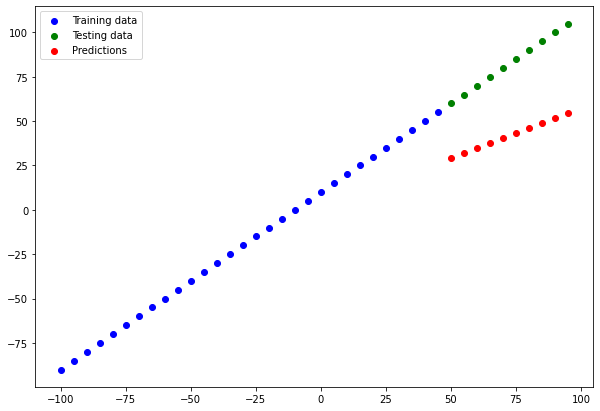

In [14]:
plot_pred()

## EVALUTIOIN OF MODEL

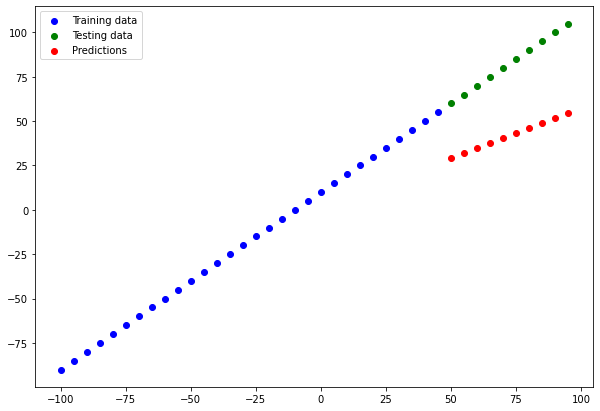

In [15]:
plot_pred()

## Evaluating our model's predictions with regression evelauation metrics

Depending on the problem you'r working on , there will be different evalution metrics to evaluate your model's performance.

Since we're working on a regression , two of the main metrics:
* **MAE** - MEAN ABSOLUTE ERROR, on  average , how wrong is each of my model's predictions.
>as a great starter metrics for any regression problems

* **MSE** - mean square error, square the average errors.
>use this when large errors are more significant than smaller errors
* **Huber** -tf.keras.losses.huber()
>combination of MSE and MAE .less sensitive to outliers than MSE


# First one:

In [16]:
  #Evaluate the model on the test data
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 140ms/step - loss: 40.6216 - mae: 40.6216


[40.621620178222656, 40.621620178222656]

# Second option:

**CALCULATE THE MAE:**
this result should be a scaler value since it adds all records and performs the mae like the result of **model.evaluate(X_test,y_test)**

In [18]:
#ans is tensor array
tf.keras.losses.MAE(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([24.66618 , 19.68748 , 15.981512, 13.548285, 12.5     , 12.748587,
       14.269903, 17.063953, 21.130726, 26.47023 ], dtype=float32)>

In [19]:
#ans is also a tensor array
mae=tf.metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([24.66618 , 19.68748 , 15.981512, 13.548285, 12.5     , 12.748587,
       14.269903, 17.063953, 21.130726, 26.47023 ], dtype=float32)>

In [17]:
y_pred

array([[29.153252],
       [31.981058],
       [34.80886 ],
       [37.636665],
       [40.46447 ],
       [43.29228 ],
       [46.120087],
       [48.94789 ],
       [51.7757  ],
       [54.603508]], dtype=float32)

In [18]:
#turn y_pred into a tensor
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[29.153252],
       [31.981058],
       [34.80886 ],
       [37.636665],
       [40.46447 ],
       [43.29228 ],
       [46.120087],
       [48.94789 ],
       [51.7757  ],
       [54.603508]], dtype=float32)>

In [19]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 60,  65,  70,  75,  80,  85,  90,  95, 100, 105], dtype=int32)>

we have to **reshape our tensors** in order to do perform a **dot product**

Our **y_pred tensor** has an extra dimention compared to the **y_test**  so we **squeeze the y_pred tensor**


In [20]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([29.153252, 31.981058, 34.80886 , 37.636665, 40.46447 , 43.29228 ,
       46.120087, 48.94789 , 51.7757  , 54.603508], dtype=float32)>

In [21]:
#calculating the MAE again 
mae=tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=40.621624>

**Calculating the MSE**

In [22]:
#Calculate the mean square error
mse=tf.keras.losses.MSE(y_test,
                    tf.squeeze(y_pred)
)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1689.0433>

In [23]:
#make functions of MAE and MSE
def mae(y_true,y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))



def mse(y_true,y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))


### Running  experiments to improve our model 
```Bulid A Model -> Fit it -> Evaluate it->tweak a model->fit it->evaluate it->tweak model -> fit it ->evalute it ...```


1. `model_1` - same as original model ,1 layer ,trianed for 150 epochs
2. `model_2` -2 layers, trained for 100 epochs
3. `model_3` -2 layers ,trained for 500 epochs


**Bulid Model_1**

In [24]:
#set random seed
tf.random.set_seed(42)

#create the model
model_1=tf.keras.Sequential([
    Dense(units=10,input_shape=(1,)),
    Dense(units=1)
])

#compile model
model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae']
    
)

#fit model
model_1.fit(X_train,
          y_train,
          epochs=150,
          
)

Epoch 1/150
1/1 [==============================] - 1s 889ms/step - loss: 59.1699 - mae: 59.1699
Epoch 2/150
1/1 [==============================] - 0s 18ms/step - loss: 13.4235 - mae: 13.4235
Epoch 3/150
1/1 [==============================] - 0s 12ms/step - loss: 33.6927 - mae: 33.6927
Epoch 4/150
1/1 [==============================] - 0s 15ms/step - loss: 21.8120 - mae: 21.8120
Epoch 5/150
1/1 [==============================] - 0s 17ms/step - loss: 31.2238 - mae: 31.2238
Epoch 6/150
1/1 [==============================] - 0s 11ms/step - loss: 13.1378 - mae: 13.1378
Epoch 7/150
1/1 [==============================] - 0s 17ms/step - loss: 22.0008 - mae: 22.0008
Epoch 8/150
1/1 [==============================] - 0s 12ms/step - loss: 16.1635 - mae: 16.1635
Epoch 9/150
1/1 [==============================] - 0s 17ms/step - loss: 19.3893 - mae: 19.3893
Epoch 10/150
1/1 [==============================] - 0s 14ms/step - loss: 15.3925 - mae: 15.3925
Epoch 11/150
1/1 [==============================

1/1 [==============================] - 0s 111ms/step


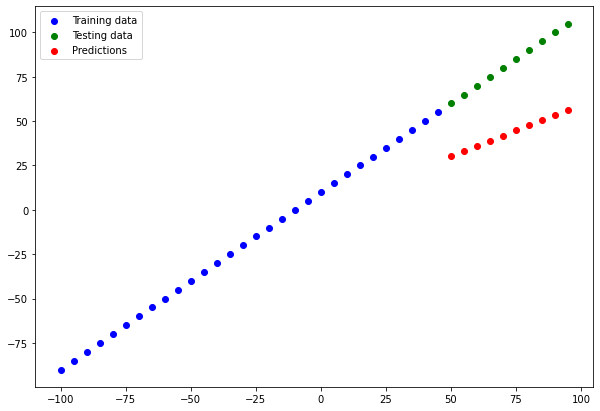

In [25]:
#Visualize predictions for model_1
y_pred_1 = model_1.predict(X_test)

plot_pred(predictions=y_pred_1)



In [26]:
#calculating model_1 evaluation metrics
mae_1 = mae(y_test,y_pred_1)
mse_1= mse(y_test,y_pred_1)

mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=39.191875>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1572.4956>)

**model_2**

In [27]:
#set random seed
tf.random.set_seed(42)

#build model
model_2=tf.keras.Sequential([
    Dense(units=10,input_shape=(1,)),
    Dense(units=5),
    Dense(units=1)
])
 #compile Model_2
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae']
)


#Fit model_2
model_2.fit(X_train,
            y_train,
            epochs=50
)

Epoch 1/50
1/1 [==============================] - 0s 419ms/step - loss: 31.2149 - mae: 31.2149
Epoch 2/50
1/1 [==============================] - 0s 13ms/step - loss: 77.3720 - mae: 77.3720
Epoch 3/50
1/1 [==============================] - 0s 11ms/step - loss: 41.3077 - mae: 41.3077
Epoch 4/50
1/1 [==============================] - 0s 12ms/step - loss: 34.2821 - mae: 34.2821
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 25.1951 - mae: 25.1951
Epoch 6/50
1/1 [==============================] - 0s 12ms/step - loss: 7.0911 - mae: 7.0911
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 16.1423 - mae: 16.1423
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 26.1292 - mae: 26.1292
Epoch 9/50
1/1 [==============================] - 0s 9ms/step - loss: 8.8989 - mae: 8.8989
Epoch 10/50
1/1 [==============================] - 0s 8ms/step - loss: 34.3977 - mae: 34.3977
Epoch 11/50
1/1 [==============================] - 0s 8ms/step - lo

1/1 [==============================] - 0s 78ms/step


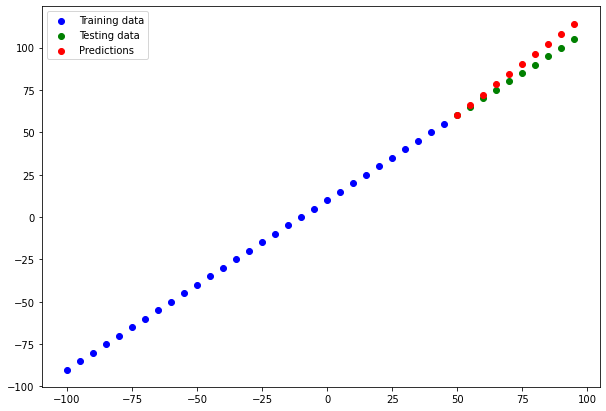

In [28]:
#visualize plot predictionns for model_2
y_pred_2=  model_2.predict(X_test)
plot_pred(predictions=y_pred_2)

In [29]:
#calculating model_2 evaluation metrics
mae_2 = mae(y_test,y_pred_2)
mse_2= mse(y_test,y_pred_2)

mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=4.733027>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.381306>)

**model_3**


In [30]:
#bulding the neursl network for the data
# Build model
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    Dense(units=100,input_shape=(1,),activation="relu"),
    Dense(units=1)
    
])


#compile model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01), #Adam(lr=0.01),
              metrics=["mae"]
)

model_3.fit(X_train,
            y_train,
            epochs=1000
)

Epoch 1/1000
1/1 [==============================] - 1s 506ms/step - loss: 35.7719 - mae: 35.7719
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 35.2689 - mae: 35.2689
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 34.7652 - mae: 34.7652
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 34.2605 - mae: 34.2605
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 33.7526 - mae: 33.7526
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 33.2438 - mae: 33.2438
Epoch 7/1000
1/1 [==============================] - 0s 13ms/step - loss: 32.7339 - mae: 32.7339
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 32.2231 - mae: 32.2231
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 31.7114 - mae: 31.7114
Epoch 10/1000
1/1 [==============================] - 0s 13ms/step - loss: 31.1987 - mae: 31.1987
Epoch 11/1000
1/1 [========================

1/1 [==============================] - 0s 6ms/step - loss: 3.8458 - mae: 3.8458
Epoch 173/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.8428 - mae: 3.8428
Epoch 174/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.8398 - mae: 3.8398
Epoch 175/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.8369 - mae: 3.8369
Epoch 176/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.8339 - mae: 3.8339
Epoch 177/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.8308 - mae: 3.8308
Epoch 178/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.8277 - mae: 3.8277
Epoch 179/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.8246 - mae: 3.8246
Epoch 180/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.8221 - mae: 3.8221
Epoch 181/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.8186 - mae: 3.8186
Epoch 182/1000
1/1 [==============================] - 0s 9ms/ste

1/1 [==============================] - 0s 8ms/step - loss: 3.2442 - mae: 3.2442
Epoch 345/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.2401 - mae: 3.2401
Epoch 346/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.2358 - mae: 3.2358
Epoch 347/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.2318 - mae: 3.2318
Epoch 348/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.2276 - mae: 3.2276
Epoch 349/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.2235 - mae: 3.2235
Epoch 350/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.2194 - mae: 3.2194
Epoch 351/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.2151 - mae: 3.2151
Epoch 352/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.2112 - mae: 3.2112
Epoch 353/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.2072 - mae: 3.2072
Epoch 354/1000
1/1 [==============================] - 0s 8ms/s

1/1 [==============================] - 0s 11ms/step - loss: 2.3220 - mae: 2.3220
Epoch 517/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.3135 - mae: 2.3135
Epoch 518/1000
1/1 [==============================] - 0s 10ms/step - loss: 2.3005 - mae: 2.3005
Epoch 519/1000
1/1 [==============================] - 0s 10ms/step - loss: 2.2910 - mae: 2.2910
Epoch 520/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.2832 - mae: 2.2832
Epoch 521/1000
1/1 [==============================] - 0s 10ms/step - loss: 2.2749 - mae: 2.2749
Epoch 522/1000
1/1 [==============================] - 0s 10ms/step - loss: 2.2673 - mae: 2.2673
Epoch 523/1000
1/1 [==============================] - 0s 10ms/step - loss: 2.2570 - mae: 2.2570
Epoch 524/1000
1/1 [==============================] - 0s 10ms/step - loss: 2.2495 - mae: 2.2495
Epoch 525/1000
1/1 [==============================] - 0s 10ms/step - loss: 2.2426 - mae: 2.2426
Epoch 526/1000
1/1 [==============================] - 0s

Epoch 687/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.8567 - mae: 0.8567
Epoch 688/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.8724 - mae: 0.8724
Epoch 689/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.6614 - mae: 0.6614
Epoch 690/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.7053 - mae: 0.7053
Epoch 691/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.8126 - mae: 0.8126
Epoch 692/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.7565 - mae: 0.7565
Epoch 693/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.7967 - mae: 0.7967
Epoch 694/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.7759 - mae: 0.7759
Epoch 695/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.7414 - mae: 0.7414
Epoch 696/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.7350 - mae: 0.7350
Epoch 697/1000
1/1 [=====================

1/1 [==============================] - 0s 9ms/step - loss: 0.2368 - mae: 0.2368
Epoch 859/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2768 - mae: 0.2768
Epoch 860/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.2030 - mae: 0.2030
Epoch 861/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2002 - mae: 0.2002
Epoch 862/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2000 - mae: 0.2000
Epoch 863/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1407 - mae: 0.1407
Epoch 864/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.3605 - mae: 0.3605
Epoch 865/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.4083 - mae: 0.4083
Epoch 866/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2628 - mae: 0.2628
Epoch 867/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1509 - mae: 0.1509
Epoch 868/1000
1/1 [==============================] - 0s 8ms/s

1/1 [==============================] - 0s 12ms/step - loss: 0.0829 - mae: 0.0829
Epoch 945/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1159 - mae: 0.1159
Epoch 946/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0596 - mae: 0.0596
Epoch 947/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0848 - mae: 0.0848
Epoch 948/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0969 - mae: 0.0969
Epoch 949/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0648 - mae: 0.0648
Epoch 950/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0963 - mae: 0.0963
Epoch 951/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0767 - mae: 0.0767
Epoch 952/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1312 - mae: 0.1312
Epoch 953/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0495 - mae: 0.0495
Epoch 954/1000
1/1 [==============================] - 0s 17ms

1/1 [==============================] - 0s 51ms/step


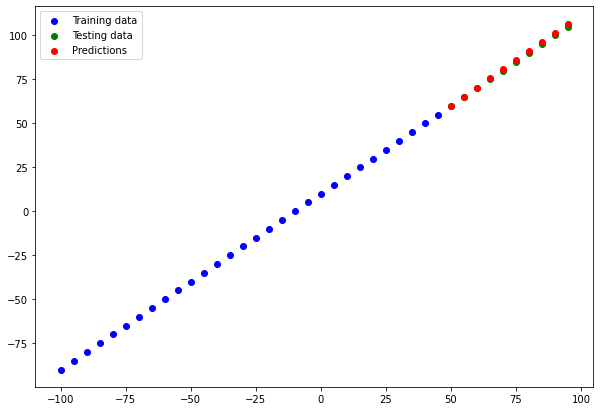

In [31]:
#visualize plot predictionns for model_3
y_pred_3=  model_3.predict(X_test)
plot_pred(predictions=y_pred_3)

In [32]:
#calculating model_2 evaluation metrics
mae_3 = mae(y_test,y_pred_3)
mse_3= mse(y_test,y_pred_3)

mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.8637768>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0611595>)

# Comparing The results of our experiments


In [33]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd
model_results =[['model_1',mae_1,mse_1],
               ['model_2',mae_2,mse_2],
               ['model_3',mae_3,mse_3]]

all_results = pd.DataFrame(model_results,columns =["Models","MSE ","MAE"])
all_results

,Models,MSE,MAE
0,model_1,"tf.Tensor(39.191875, shape=(), dtype=float32)","tf.Tensor(1572.4956, shape=(), dtype=float32)"
1,model_2,"tf.Tensor(4.733027, shape=(), dtype=float32)","tf.Tensor(30.381306, shape=(), dtype=float32)"
2,model_3,"tf.Tensor(0.8637768, shape=(), dtype=float32)","tf.Tensor(1.0611595, shape=(), dtype=float32)"


In [34]:
model_results =[['model_1',mae_1.numpy(),mse_1.numpy()],
               ['model_2',mae_2.numpy(),mse_2.numpy()],
               ['model_3',mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results,columns =["Models","MSE ","MAE"])
all_results



,Models,MSE,MAE
0,model_1,39.191875,1572.495605
1,model_2,4.733027,30.381306
2,model_3,0.863777,1.061159


**Note:** one of the goals should be to minimize the time between  y our experiments.The more experiment s you do , the more things you'll  figure out which dont work and in turn , get closer to t figure out which don't work and  in  turn,get closer to figuring out what does work. Remember that machine learning practioner's ``experiment experiment experiment``

**Looks like model_3 performs better**

In [39]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


# Tracking your Experiments

One really good habit in ML modeling  is to track your experiment.

And when doing so, it can be tedious if you're running lots of experiments.

Luckyly there are  tools to help us!

**Resources:** As you build more model , you'll want to look into using :

* TensorBoard - a component of the Tensorflow library to help track modeling experiments .
* Weights & Biases - a tool for tracking all of kind of ML experiments (plugs straight  into TensorBoard)

# Saving our Models

Saving our model allows us to use the model outside the Notebook.
such as in web application or a mobile app.
There are 2 main formats to save the model
* The SaveModel format
* The HDF5 format

In [41]:
#Saving model using the SaveModel format
model_3.save("firstModel")

INFO:tensorflow:Assets written to: firstModel/assets


INFO:tensorflow:Assets written to: firstModel/assets


In [42]:
#Saving Model using the HDF5 format
model_3.save("myHDF5Model.h5")

# Loading in a saved model.

In [43]:
#loading the SaveModel format model
load_SaveModel_format = tf.keras.models.load_model("firstModel")

In [45]:
load_SaveModel_format.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [46]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [53]:
#comparing Model_3 predictions with SaveModel format model prediction

mod3_pred = model_3.predict(X_test)
load_SM_pred = load_SaveModel_format.predict(X_test)
mod3_pred == load_SM_pred

1/1 [==============================] - 0s 21ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [57]:
# compare MAE of model_3 and the loadd_SM_pred
mae(y_true=y_test,y_pred=y_pred_3) == mae(y_true=y_test,y_pred=mod3_pred)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [51]:
# loading model using .h5 format
loadd_h5=tf.keras.models.load_model("myHDF5Model.h5")
loadd_h5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [54]:
#check to see is loadeed h5 matches prediction in model_3
loadd_h5_pred=loadd_h5.predict(X_test)
mod3_pred == loadd_h5_pred

1/1 [==============================] - 0s 60ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

 # Kaggle Project

In [1]:
# importing  required Libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

2022-12-18 05:50:33.460670: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-18 05:50:33.460708: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-18 05:50:35.468340: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-18 05:50:35.468494: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-18 05:50:35.468505: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#encoding 
data=pd.get_dummies(insurance)
data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [5]:
# Create X & y values(Features and lables)

In [6]:
X=data.drop("charges",axis=1)
y=data["charges"]

In [7]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [9]:
sns.heatmap(data.corr() )

NameError: name 'sns' is not defined

In [8]:
#Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

(1070, 268, 1070, 268)

In [9]:
#Build a nueral Network
#set random seed
tf.random.set_seed(42)


#create model
insurance_model=tf.keras.Sequential([
    Dense(units=10),
    Dense(units=1)
])


#compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"]
                        
)


#fit model
insurance_model.fit(X_train,
                    y_train,
                    epochs=100
)

2022-12-18 05:54:54.684322: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-18 05:54:54.684886: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-18 05:54:54.684930: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mylar-pc): /proc/driver/nvidia/version does not exist


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8577.6963 - mae: 8577.6963
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.3076 - mae: 7886.3076
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7603.0801 - mae: 7603.0801
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7537.6128 - mae: 7537.6128
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7724.5220 - mae: 7724.5220
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7602.6479 - mae: 7602.6479
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7529.5884 - mae: 7529.5884
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7740.5986 - mae: 7740.5986
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7608.8887 - mae: 7608.8887
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7750.6631 - mae: 7750.6631

In [12]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7160.8926 - mae: 7160.8926


[7160.892578125, 7160.892578125]

In [10]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364489)

In [12]:
#model not performinf well 

# Experiment to improve insurance_model

# model 1

In [11]:
#set random seed
tf.random.set_seed(42)


#create model
model_1=tf.keras.Sequential([
    Dense(units=100),
    Dense(units=10),
    Dense(units=1)
])


#compile model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]
                        
)


#fit model
model_1.fit(X_train,
            y_train,
            epochs=100
)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13308.8154 - mae: 13308.8154
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13123.8770 - mae: 13123.8770
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12742.4551 - mae: 12742.4551
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12005.5020 - mae: 12005.5020
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10806.4121 - mae: 10806.4121
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9332.5820 - mae: 9332.5820
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8044.3311 - mae: 8044.3311
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7491.5796 - mae: 7491.5796
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7408.1587 - mae: 7408.1587
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7388.4512 - mae:

34/34 [==============================] - 0s 3ms/step - loss: 5736.5200 - mae: 5736.5200
Epoch 83/100
34/34 [==============================] - 0s 3ms/step - loss: 5705.6895 - mae: 5705.6895
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 5668.1968 - mae: 5668.1968
Epoch 85/100
34/34 [==============================] - 0s 3ms/step - loss: 5637.7407 - mae: 5637.7407
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 5600.9512 - mae: 5600.9512
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 5559.4609 - mae: 5559.4609
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 5520.6572 - mae: 5520.6572
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 5475.9785 - mae: 5475.9785
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 5428.9419 - mae: 5428.9419
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 5388.1206 - mae: 5388.1206
Epo

In [12]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               1200      
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_1.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4755.6016 - mae: 4755.6016


[4755.6015625, 4755.6015625]

# MODEL_2

In [14]:
#set random seed
tf.random.set_seed(42)


#create model
model_2=tf.keras.Sequential([
    Dense(units=100),
    Dense(units=15),
    Dense(units=10),
    Dense(units=1)
])


#compile model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]
                        
)


#fit model
model_2.fit(X_train,
            y_train,
            epochs=200
)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13276.0449 - mae: 13276.0449
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 12923.9062 - mae: 12923.9062
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 11676.6191 - mae: 11676.6191
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 8869.1826 - mae: 8869.1826
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 7437.7256 - mae: 7437.7256
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 7387.1309 - mae: 7387.1309
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7333.2759 - mae: 7333.2759
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7294.0352 - mae: 7294.0352
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7253.9355 - mae: 7253.9355
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7213.3193 - mae: 721

34/34 [==============================] - 0s 2ms/step - loss: 3488.7161 - mae: 3488.7161
Epoch 163/200
34/34 [==============================] - 0s 2ms/step - loss: 3490.3979 - mae: 3490.3979
Epoch 164/200
34/34 [==============================] - 0s 2ms/step - loss: 3503.5701 - mae: 3503.5701
Epoch 165/200
34/34 [==============================] - 0s 2ms/step - loss: 3505.4058 - mae: 3505.4058
Epoch 166/200
34/34 [==============================] - 0s 2ms/step - loss: 3482.4106 - mae: 3482.4106
Epoch 167/200
34/34 [==============================] - 0s 2ms/step - loss: 3492.0981 - mae: 3492.0981
Epoch 168/200
34/34 [==============================] - 0s 2ms/step - loss: 3490.6814 - mae: 3490.6814
Epoch 169/200
34/34 [==============================] - 0s 2ms/step - loss: 3484.8254 - mae: 3484.8254
Epoch 170/200
34/34 [==============================] - 0s 2ms/step - loss: 3482.2041 - mae: 3482.2041
Epoch 171/200
34/34 [==============================] - 0s 2ms/step - loss: 3486.4917 - mae: 3486

In [15]:
model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3165.5688 - mae: 3165.5688


[3165.56884765625, 3165.56884765625]

# Model_3

In [16]:
#set random seed
tf.random.set_seed(42)


#create model
model_3=tf.keras.Sequential([
    Dense(units=100),
    Dense(units=15),
    Dense(units=10),
    Dense(units=1)
])


#compile model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"]
                        
)


#fit model
model_3.fit(X_train,
            y_train,
            epochs=200
)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13270.0449 - mae: 13270.0449
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 12882.6338 - mae: 12882.6338
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 11437.0273 - mae: 11437.0273
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 8428.1191 - mae: 8428.1191
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 7431.9634 - mae: 7431.9634
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 7388.4790 - mae: 7388.4790
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7331.0884 - mae: 7331.0884
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7289.3315 - mae: 7289.3315
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7246.5518 - mae: 7246.5518
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7204.4922 - mae: 720

34/34 [==============================] - 0s 2ms/step - loss: 3483.7356 - mae: 3483.7356
Epoch 163/200
34/34 [==============================] - 0s 2ms/step - loss: 3490.2039 - mae: 3490.2039
Epoch 164/200
34/34 [==============================] - 0s 2ms/step - loss: 3511.8423 - mae: 3511.8423
Epoch 165/200
34/34 [==============================] - 0s 2ms/step - loss: 3513.1152 - mae: 3513.1152
Epoch 166/200
34/34 [==============================] - 0s 3ms/step - loss: 3479.6404 - mae: 3479.6404
Epoch 167/200
34/34 [==============================] - 0s 4ms/step - loss: 3492.6179 - mae: 3492.6179
Epoch 168/200
34/34 [==============================] - 0s 3ms/step - loss: 3492.1970 - mae: 3492.1970
Epoch 169/200
34/34 [==============================] - 0s 2ms/step - loss: 3481.8323 - mae: 3481.8323
Epoch 170/200
34/34 [==============================] - 0s 2ms/step - loss: 3485.0234 - mae: 3485.0234
Epoch 171/200
34/34 [==============================] - 0s 2ms/step - loss: 3488.6409 - mae: 3488

In [17]:
model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3161.1433 - mae: 3161.1433


[3161.143310546875, 3161.143310546875]

# Model 4

In [19]:
#set random seed
tf.random.set_seed(42)


#create model
model_4=tf.keras.Sequential([
    Dense(units=10),
    Dense(units=15),
    Dense(units=10),
    Dense(units=1)
])


#compile model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"]
                        
)


#fit model
model_4.fit(X_train,
            y_train,
            epochs=200
)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13320.6660 - mae: 13320.6660
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13257.2578 - mae: 13257.2578
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13099.4248 - mae: 13099.4248
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12715.9199 - mae: 12715.9199
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11876.9678 - mae: 11876.9678
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 10355.9238 - mae: 10355.9238
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8515.6318 - mae: 8515.6318
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7551.9189 - mae: 7551.9189
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7458.8008 - mae: 7458.8008
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7439.7632 - ma

34/34 [==============================] - 0s 2ms/step - loss: 5944.0884 - mae: 5944.0884
Epoch 83/200
34/34 [==============================] - 0s 2ms/step - loss: 5913.4771 - mae: 5913.4771
Epoch 84/200
34/34 [==============================] - 0s 2ms/step - loss: 5879.5933 - mae: 5879.5933
Epoch 85/200
34/34 [==============================] - 0s 2ms/step - loss: 5849.9946 - mae: 5849.9946
Epoch 86/200
34/34 [==============================] - 0s 2ms/step - loss: 5814.0415 - mae: 5814.0415
Epoch 87/200
34/34 [==============================] - 0s 2ms/step - loss: 5777.1743 - mae: 5777.1743
Epoch 88/200
34/34 [==============================] - 0s 2ms/step - loss: 5738.8701 - mae: 5738.8701
Epoch 89/200
34/34 [==============================] - 0s 2ms/step - loss: 5694.9165 - mae: 5694.9165
Epoch 90/200
34/34 [==============================] - 0s 2ms/step - loss: 5647.6885 - mae: 5647.6885
Epoch 91/200
34/34 [==============================] - 0s 2ms/step - loss: 5605.3350 - mae: 5605.3350
Epo

In [20]:
model_4.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3429.2307 - mae: 3429.2307


[3429.230712890625, 3429.230712890625]

# Model 5

In [23]:
#set random seed
tf.random.set_seed(42)


#create model
model_5=tf.keras.Sequential([
    Dense(units=25,activation="relu"),
    Dense(units=10,activation="relu"),
    Dense(units=50,activation="relu"),
    Dense(units=1)
])


#compile model
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"]
                        
)


#fit model
model_5.fit(X_train,
            y_train,
            epochs=500
)

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 13343.8496 - mae: 13343.8496
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13304.9893 - mae: 13304.9893
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 13189.2773 - mae: 13189.2773
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 12853.2139 - mae: 12853.2139
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 12022.1006 - mae: 12022.1006
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 10397.5420 - mae: 10397.5420
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 8413.4229 - mae: 8413.4229
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 7524.1831 - mae: 7524.1831
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 7462.9561 - mae: 7462.9561
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 7443.4463 - ma

34/34 [==============================] - 0s 2ms/step - loss: 5756.8760 - mae: 5756.8760
Epoch 83/500
34/34 [==============================] - 0s 2ms/step - loss: 5718.4712 - mae: 5718.4712
Epoch 84/500
34/34 [==============================] - 0s 2ms/step - loss: 5665.5581 - mae: 5665.5581
Epoch 85/500
34/34 [==============================] - 0s 2ms/step - loss: 5613.2109 - mae: 5613.2109
Epoch 86/500
34/34 [==============================] - 0s 2ms/step - loss: 5556.1016 - mae: 5556.1016
Epoch 87/500
34/34 [==============================] - 0s 2ms/step - loss: 5499.3745 - mae: 5499.3745
Epoch 88/500
34/34 [==============================] - 0s 2ms/step - loss: 5443.6821 - mae: 5443.6821
Epoch 89/500
34/34 [==============================] - 0s 2ms/step - loss: 5373.8408 - mae: 5373.8408
Epoch 90/500
34/34 [==============================] - 0s 2ms/step - loss: 5300.5854 - mae: 5300.5854
Epoch 91/500
34/34 [==============================] - 0s 2ms/step - loss: 5220.8628 - mae: 5220.8628
Epo

34/34 [==============================] - 0s 2ms/step - loss: 2548.5032 - mae: 2548.5032
Epoch 243/500
34/34 [==============================] - 0s 3ms/step - loss: 2570.8022 - mae: 2570.8022
Epoch 244/500
34/34 [==============================] - 0s 2ms/step - loss: 2554.0408 - mae: 2554.0408
Epoch 245/500
34/34 [==============================] - 0s 2ms/step - loss: 2546.5867 - mae: 2546.5867
Epoch 246/500
34/34 [==============================] - 0s 2ms/step - loss: 2537.1685 - mae: 2537.1685
Epoch 247/500
34/34 [==============================] - 0s 2ms/step - loss: 2536.5076 - mae: 2536.5076
Epoch 248/500
34/34 [==============================] - 0s 2ms/step - loss: 2541.5090 - mae: 2541.5090
Epoch 249/500
34/34 [==============================] - 0s 2ms/step - loss: 2536.8994 - mae: 2536.8994
Epoch 250/500
34/34 [==============================] - 0s 2ms/step - loss: 2531.6489 - mae: 2531.6489
Epoch 251/500
34/34 [==============================] - 0s 2ms/step - loss: 2533.3479 - mae: 2533

34/34 [==============================] - 0s 2ms/step - loss: 2204.9299 - mae: 2204.9299
Epoch 403/500
34/34 [==============================] - 0s 2ms/step - loss: 2205.8499 - mae: 2205.8499
Epoch 404/500
34/34 [==============================] - 0s 2ms/step - loss: 2208.5630 - mae: 2208.5630
Epoch 405/500
34/34 [==============================] - 0s 2ms/step - loss: 2208.2917 - mae: 2208.2917
Epoch 406/500
34/34 [==============================] - 0s 2ms/step - loss: 2198.8511 - mae: 2198.8511
Epoch 407/500
34/34 [==============================] - 0s 2ms/step - loss: 2197.8748 - mae: 2197.8748
Epoch 408/500
34/34 [==============================] - 0s 2ms/step - loss: 2194.6904 - mae: 2194.6904
Epoch 409/500
34/34 [==============================] - 0s 2ms/step - loss: 2201.0483 - mae: 2201.0483
Epoch 410/500
34/34 [==============================] - 0s 2ms/step - loss: 2202.5183 - mae: 2202.5183
Epoch 411/500
34/34 [==============================] - 0s 2ms/step - loss: 2209.3069 - mae: 2209

In [24]:
model_5.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1921.4218 - mae: 1921.4218


[1921.4217529296875, 1921.4217529296875]

In [ ]:
#555555555555555555555555555555555555555

# MODEL 6

In [25]:
#set random seed
tf.random.set_seed(42)


#create model
model_6=tf.keras.Sequential([
    Dense(units=6),
    Dense(units=5),
    Dense(units=4),
    Dense(units=3),
    Dense(units=2),
    Dense(units=1)
])


#compile model
model_6.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"]
                        
)


#fit model
model_6.fit(X_train,
            y_train,
            epochs=500
)

Epoch 1/500
34/34 [==============================] - 1s 4ms/step - loss: 13337.8945 - mae: 13337.8945
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13320.6934 - mae: 13320.6934
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 13284.8271 - mae: 13284.8271
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 13206.7363 - mae: 13206.7363
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 13026.9902 - mae: 13026.9902
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 12596.2852 - mae: 12596.2852
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 11617.1426 - mae: 11617.1426
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 9838.4473 - mae: 9838.4473
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 7993.5020 - mae: 7993.5020
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7511.8130 - 

34/34 [==============================] - 0s 3ms/step - loss: 6097.3970 - mae: 6097.3970
Epoch 83/500
34/34 [==============================] - 0s 3ms/step - loss: 6075.5342 - mae: 6075.5342
Epoch 84/500
34/34 [==============================] - 0s 3ms/step - loss: 6051.4209 - mae: 6051.4209
Epoch 85/500
34/34 [==============================] - 0s 3ms/step - loss: 6030.7505 - mae: 6030.7505
Epoch 86/500
34/34 [==============================] - 0s 3ms/step - loss: 6004.9053 - mae: 6004.9053
Epoch 87/500
34/34 [==============================] - 0s 3ms/step - loss: 5978.6880 - mae: 5978.6880
Epoch 88/500
34/34 [==============================] - 0s 2ms/step - loss: 5959.4229 - mae: 5959.4229
Epoch 89/500
34/34 [==============================] - 0s 2ms/step - loss: 5925.9863 - mae: 5925.9863
Epoch 90/500
34/34 [==============================] - 0s 3ms/step - loss: 5895.4741 - mae: 5895.4741
Epoch 91/500
34/34 [==============================] - 0s 2ms/step - loss: 5870.6294 - mae: 5870.6294
Epo

34/34 [==============================] - 0s 2ms/step - loss: 3558.6846 - mae: 3558.6846
Epoch 243/500
34/34 [==============================] - 0s 2ms/step - loss: 3549.9673 - mae: 3549.9673
Epoch 244/500
34/34 [==============================] - 0s 2ms/step - loss: 3567.5967 - mae: 3567.5967
Epoch 245/500
34/34 [==============================] - 0s 2ms/step - loss: 3546.2761 - mae: 3546.2761
Epoch 246/500
34/34 [==============================] - 0s 2ms/step - loss: 3538.6140 - mae: 3538.6140
Epoch 247/500
34/34 [==============================] - 0s 2ms/step - loss: 3534.0273 - mae: 3534.0273
Epoch 248/500
34/34 [==============================] - 0s 4ms/step - loss: 3557.7332 - mae: 3557.7332
Epoch 249/500
34/34 [==============================] - 0s 4ms/step - loss: 3535.2017 - mae: 3535.2017
Epoch 250/500
34/34 [==============================] - 0s 4ms/step - loss: 3526.7485 - mae: 3526.7485
Epoch 251/500
34/34 [==============================] - 0s 4ms/step - loss: 3532.9631 - mae: 3532

34/34 [==============================] - 0s 3ms/step - loss: 3480.2502 - mae: 3480.2502
Epoch 403/500
34/34 [==============================] - 0s 2ms/step - loss: 3487.2664 - mae: 3487.2664
Epoch 404/500
34/34 [==============================] - 0s 2ms/step - loss: 3487.5759 - mae: 3487.5759
Epoch 405/500
34/34 [==============================] - 0s 2ms/step - loss: 3475.4729 - mae: 3475.4729
Epoch 406/500
34/34 [==============================] - 0s 2ms/step - loss: 3486.6938 - mae: 3486.6938
Epoch 407/500
34/34 [==============================] - 0s 2ms/step - loss: 3485.3516 - mae: 3485.3516
Epoch 408/500
34/34 [==============================] - 0s 2ms/step - loss: 3483.1331 - mae: 3483.1331
Epoch 409/500
34/34 [==============================] - 0s 2ms/step - loss: 3484.8467 - mae: 3484.8467
Epoch 410/500
34/34 [==============================] - 0s 2ms/step - loss: 3484.1658 - mae: 3484.1658
Epoch 411/500
34/34 [==============================] - 0s 2ms/step - loss: 3488.0664 - mae: 3488

In [26]:
model_6.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3157.7129 - mae: 3157.7129


[3157.712890625, 3157.712890625]

# MODEL_7

In [20]:
#set random seed
tf.random.set_seed(42)


#create model
model_7=tf.keras.Sequential([
    Dense(units=50),
    Dense(units=25),
    Dense(units=10),
    Dense(units=5),
    Dense(units=1)
])


#compile model
model_7.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"]
                        
)


#fit model
model_7.fit(X_train,
            y_train,
            epochs=600
)

Epoch 1/600
34/34 [==============================] - 1s 2ms/step - loss: 13243.8164 - mae: 13243.8164
Epoch 2/600
34/34 [==============================] - 0s 3ms/step - loss: 12729.8115 - mae: 12729.8115
Epoch 3/600
34/34 [==============================] - 0s 2ms/step - loss: 10549.7002 - mae: 10549.7002
Epoch 4/600
34/34 [==============================] - 0s 2ms/step - loss: 7529.6548 - mae: 7529.6548
Epoch 5/600
34/34 [==============================] - 0s 2ms/step - loss: 7347.2061 - mae: 7347.2061
Epoch 6/600
34/34 [==============================] - 0s 2ms/step - loss: 7305.9512 - mae: 7305.9512
Epoch 7/600
34/34 [==============================] - 0s 3ms/step - loss: 7245.4839 - mae: 7245.4839
Epoch 8/600
34/34 [==============================] - 0s 3ms/step - loss: 7191.3472 - mae: 7191.3472
Epoch 9/600
34/34 [==============================] - 0s 3ms/step - loss: 7136.6807 - mae: 7136.6807
Epoch 10/600
34/34 [==============================] - 0s 3ms/step - loss: 7080.3452 - mae: 708

34/34 [==============================] - 0s 2ms/step - loss: 3486.5498 - mae: 3486.5498
Epoch 163/600
34/34 [==============================] - 0s 2ms/step - loss: 3490.4883 - mae: 3490.4883
Epoch 164/600
34/34 [==============================] - 0s 2ms/step - loss: 3512.5017 - mae: 3512.5017
Epoch 165/600
34/34 [==============================] - 0s 2ms/step - loss: 3508.9768 - mae: 3508.9768
Epoch 166/600
34/34 [==============================] - 0s 2ms/step - loss: 3484.2598 - mae: 3484.2598
Epoch 167/600
34/34 [==============================] - 0s 2ms/step - loss: 3490.5276 - mae: 3490.5276
Epoch 168/600
34/34 [==============================] - 0s 2ms/step - loss: 3492.1162 - mae: 3492.1162
Epoch 169/600
34/34 [==============================] - 0s 2ms/step - loss: 3490.3716 - mae: 3490.3716
Epoch 170/600
34/34 [==============================] - 0s 2ms/step - loss: 3485.4683 - mae: 3485.4683
Epoch 171/600
34/34 [==============================] - 0s 2ms/step - loss: 3490.0027 - mae: 3490

34/34 [==============================] - 0s 2ms/step - loss: 3498.7505 - mae: 3498.7505
Epoch 323/600
34/34 [==============================] - 0s 2ms/step - loss: 3495.8232 - mae: 3495.8232
Epoch 324/600
34/34 [==============================] - 0s 2ms/step - loss: 3498.6047 - mae: 3498.6047
Epoch 325/600
34/34 [==============================] - 0s 2ms/step - loss: 3488.8120 - mae: 3488.8120
Epoch 326/600
34/34 [==============================] - 0s 2ms/step - loss: 3517.3303 - mae: 3517.3303
Epoch 327/600
34/34 [==============================] - 0s 2ms/step - loss: 3490.8276 - mae: 3490.8276
Epoch 328/600
34/34 [==============================] - 0s 2ms/step - loss: 3521.5081 - mae: 3521.5081
Epoch 329/600
34/34 [==============================] - 0s 2ms/step - loss: 3505.4639 - mae: 3505.4639
Epoch 330/600
34/34 [==============================] - 0s 2ms/step - loss: 3496.1755 - mae: 3496.1755
Epoch 331/600
34/34 [==============================] - 0s 2ms/step - loss: 3514.4387 - mae: 3514

34/34 [==============================] - 0s 2ms/step - loss: 3501.7502 - mae: 3501.7502
Epoch 483/600
34/34 [==============================] - 0s 2ms/step - loss: 3489.1895 - mae: 3489.1895
Epoch 484/600
34/34 [==============================] - 0s 2ms/step - loss: 3482.3950 - mae: 3482.3950
Epoch 485/600
34/34 [==============================] - 0s 2ms/step - loss: 3502.8618 - mae: 3502.8618
Epoch 486/600
34/34 [==============================] - 0s 2ms/step - loss: 3506.9282 - mae: 3506.9282
Epoch 487/600
34/34 [==============================] - 0s 2ms/step - loss: 3507.7122 - mae: 3507.7122
Epoch 488/600
34/34 [==============================] - 0s 2ms/step - loss: 3488.2405 - mae: 3488.2405
Epoch 489/600
34/34 [==============================] - 0s 2ms/step - loss: 3480.5349 - mae: 3480.5349
Epoch 490/600
34/34 [==============================] - 0s 2ms/step - loss: 3486.0093 - mae: 3486.0093
Epoch 491/600
34/34 [==============================] - 0s 2ms/step - loss: 3523.5049 - mae: 3523

In [21]:
model_7.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3166.7402 - mae: 3166.7402


[3166.740234375, 3166.740234375]

# model_8

In [22]:
#set random seed
tf.random.set_seed(42)


#create model
model_8=tf.keras.Sequential([
    Dense(units=25,activation="relu"),
    Dense(units=10,activation="relu"),
    Dense(units=10,activation="relu"),
    Dense(units=1)
])


#compile model
model_8.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"]
                        
)


#fit model
model_8.fit(X_train,
            y_train,
            epochs=500
)

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 13343.3965 - mae: 13343.3965
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13335.4697 - mae: 13335.4697
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 13319.1172 - mae: 13319.1172
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 13289.9756 - mae: 13289.9756
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 13236.9805 - mae: 13236.9805
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 13141.8008 - mae: 13141.8008
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 12980.8555 - mae: 12980.8555
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 12697.8164 - mae: 12697.8164
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 12239.5527 - mae: 12239.5527
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 11547.49

Epoch 82/500
34/34 [==============================] - 0s 3ms/step - loss: 6398.6709 - mae: 6398.6709
Epoch 83/500
34/34 [==============================] - 0s 3ms/step - loss: 6389.7944 - mae: 6389.7944
Epoch 84/500
34/34 [==============================] - 0s 3ms/step - loss: 6378.3823 - mae: 6378.3823
Epoch 85/500
34/34 [==============================] - 0s 3ms/step - loss: 6374.8447 - mae: 6374.8447
Epoch 86/500
34/34 [==============================] - 0s 3ms/step - loss: 6364.4600 - mae: 6364.4600
Epoch 87/500
34/34 [==============================] - 0s 3ms/step - loss: 6357.5596 - mae: 6357.5596
Epoch 88/500
34/34 [==============================] - 0s 2ms/step - loss: 6350.2456 - mae: 6350.2456
Epoch 89/500
34/34 [==============================] - 0s 2ms/step - loss: 6343.7373 - mae: 6343.7373
Epoch 90/500
34/34 [==============================] - 0s 2ms/step - loss: 6333.6445 - mae: 6333.6445
Epoch 91/500
34/34 [==============================] - 0s 2ms/step - loss: 6326.2559 - mae: 

34/34 [==============================] - 0s 2ms/step - loss: 3355.6770 - mae: 3355.6770
Epoch 243/500
34/34 [==============================] - 0s 2ms/step - loss: 3349.4639 - mae: 3349.4639
Epoch 244/500
34/34 [==============================] - 0s 2ms/step - loss: 3348.3994 - mae: 3348.3994
Epoch 245/500
34/34 [==============================] - 0s 2ms/step - loss: 3341.7119 - mae: 3341.7119
Epoch 246/500
34/34 [==============================] - 0s 2ms/step - loss: 3339.7986 - mae: 3339.7986
Epoch 247/500
34/34 [==============================] - 0s 2ms/step - loss: 3333.6580 - mae: 3333.6580
Epoch 248/500
34/34 [==============================] - 0s 2ms/step - loss: 3334.7571 - mae: 3334.7571
Epoch 249/500
34/34 [==============================] - 0s 2ms/step - loss: 3330.4126 - mae: 3330.4126
Epoch 250/500
34/34 [==============================] - 0s 2ms/step - loss: 3322.8032 - mae: 3322.8032
Epoch 251/500
34/34 [==============================] - 0s 2ms/step - loss: 3316.3237 - mae: 3316

34/34 [==============================] - 0s 2ms/step - loss: 2964.2925 - mae: 2964.2925
Epoch 403/500
34/34 [==============================] - 0s 2ms/step - loss: 2954.9114 - mae: 2954.9114
Epoch 404/500
34/34 [==============================] - 0s 2ms/step - loss: 2956.3435 - mae: 2956.3435
Epoch 405/500
34/34 [==============================] - 0s 3ms/step - loss: 2953.0723 - mae: 2953.0723
Epoch 406/500
34/34 [==============================] - 0s 3ms/step - loss: 2954.4702 - mae: 2954.4702
Epoch 407/500
34/34 [==============================] - 0s 3ms/step - loss: 2951.4006 - mae: 2951.4006
Epoch 408/500
34/34 [==============================] - 0s 3ms/step - loss: 2951.0117 - mae: 2951.0117
Epoch 409/500
34/34 [==============================] - 0s 3ms/step - loss: 2948.3940 - mae: 2948.3940
Epoch 410/500
34/34 [==============================] - 0s 2ms/step - loss: 2948.9404 - mae: 2948.9404
Epoch 411/500
34/34 [==============================] - 0s 2ms/step - loss: 2946.4248 - mae: 2946

In [23]:
model_8.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2548.9224 - mae: 2548.9224


[2548.92236328125, 2548.92236328125]

# Model_9

In [24]:
#set random seed
tf.random.set_seed(42)


#create model
model_9=tf.keras.Sequential([
    Dense(units=10,activation="relu"),
    Dense(units=10, activation="relu"),
    Dense(units=15,activation="relu"),
    Dense(units=10,activation="relu"),
    Dense(units=10,activation="relu"),
    Dense(units=1)
])


#compile model
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"]
                        
)


#fit model
model_9.fit(X_train,
            y_train,
            epochs=1000
)

Epoch 1/1000
34/34 [==============================] - 1s 3ms/step - loss: 13346.7021 - mae: 13346.7021
Epoch 2/1000
34/34 [==============================] - 0s 3ms/step - loss: 13344.5498 - mae: 13344.5498
Epoch 3/1000
34/34 [==============================] - 0s 3ms/step - loss: 13335.5488 - mae: 13335.5488
Epoch 4/1000
34/34 [==============================] - 0s 2ms/step - loss: 13292.8994 - mae: 13292.8994
Epoch 5/1000
34/34 [==============================] - 0s 2ms/step - loss: 13137.9619 - mae: 13137.9619
Epoch 6/1000
34/34 [==============================] - 0s 3ms/step - loss: 12622.0244 - mae: 12622.0244
Epoch 7/1000
34/34 [==============================] - 0s 3ms/step - loss: 11191.4805 - mae: 11191.4805
Epoch 8/1000
34/34 [==============================] - 0s 2ms/step - loss: 8759.7793 - mae: 8759.7793
Epoch 9/1000
34/34 [==============================] - 0s 2ms/step - loss: 7580.9658 - mae: 7580.9658
Epoch 10/1000
34/34 [==============================] - 0s 3ms/step - loss: 75

34/34 [==============================] - 0s 2ms/step - loss: 3101.0122 - mae: 3101.0122
Epoch 161/1000
34/34 [==============================] - 0s 2ms/step - loss: 3082.3142 - mae: 3082.3142
Epoch 162/1000
34/34 [==============================] - 0s 2ms/step - loss: 3061.9299 - mae: 3061.9299
Epoch 163/1000
34/34 [==============================] - 0s 2ms/step - loss: 3054.4792 - mae: 3054.4792
Epoch 164/1000
34/34 [==============================] - 0s 2ms/step - loss: 3066.2678 - mae: 3066.2678
Epoch 165/1000
34/34 [==============================] - 0s 2ms/step - loss: 3049.2417 - mae: 3049.2417
Epoch 166/1000
34/34 [==============================] - 0s 2ms/step - loss: 3022.5999 - mae: 3022.5999
Epoch 167/1000
34/34 [==============================] - 0s 2ms/step - loss: 3023.1628 - mae: 3023.1628
Epoch 168/1000
34/34 [==============================] - 0s 2ms/step - loss: 3009.8921 - mae: 3009.8921
Epoch 169/1000
34/34 [==============================] - 0s 2ms/step - loss: 3001.3638 - 

34/34 [==============================] - 0s 2ms/step - loss: 2371.4504 - mae: 2371.4504
Epoch 319/1000
34/34 [==============================] - 0s 2ms/step - loss: 2377.0229 - mae: 2377.0229
Epoch 320/1000
34/34 [==============================] - 0s 2ms/step - loss: 2373.8801 - mae: 2373.8801
Epoch 321/1000
34/34 [==============================] - 0s 2ms/step - loss: 2364.0017 - mae: 2364.0017
Epoch 322/1000
34/34 [==============================] - 0s 2ms/step - loss: 2363.5649 - mae: 2363.5649
Epoch 323/1000
34/34 [==============================] - 0s 2ms/step - loss: 2354.6770 - mae: 2354.6770
Epoch 324/1000
34/34 [==============================] - 0s 2ms/step - loss: 2351.9087 - mae: 2351.9087
Epoch 325/1000
34/34 [==============================] - 0s 2ms/step - loss: 2355.3584 - mae: 2355.3584
Epoch 326/1000
34/34 [==============================] - 0s 2ms/step - loss: 2343.1006 - mae: 2343.1006
Epoch 327/1000
34/34 [==============================] - 0s 2ms/step - loss: 2336.3096 - 

34/34 [==============================] - 0s 2ms/step - loss: 2091.1704 - mae: 2091.1704
Epoch 477/1000
34/34 [==============================] - 0s 2ms/step - loss: 2080.8635 - mae: 2080.8635
Epoch 478/1000
34/34 [==============================] - 0s 2ms/step - loss: 2090.6384 - mae: 2090.6384
Epoch 479/1000
34/34 [==============================] - 0s 2ms/step - loss: 2075.4941 - mae: 2075.4941
Epoch 480/1000
34/34 [==============================] - 0s 2ms/step - loss: 2085.1687 - mae: 2085.1687
Epoch 481/1000
34/34 [==============================] - 0s 2ms/step - loss: 2074.9897 - mae: 2074.9897
Epoch 482/1000
34/34 [==============================] - 0s 2ms/step - loss: 2075.1970 - mae: 2075.1970
Epoch 483/1000
34/34 [==============================] - 0s 2ms/step - loss: 2064.0103 - mae: 2064.0103
Epoch 484/1000
34/34 [==============================] - 0s 2ms/step - loss: 2069.3542 - mae: 2069.3542
Epoch 485/1000
34/34 [==============================] - 0s 2ms/step - loss: 2076.9895 - 

34/34 [==============================] - 0s 2ms/step - loss: 2045.2161 - mae: 2045.2161
Epoch 635/1000
34/34 [==============================] - 0s 2ms/step - loss: 2049.0139 - mae: 2049.0139
Epoch 636/1000
34/34 [==============================] - 0s 2ms/step - loss: 2034.8942 - mae: 2034.8942
Epoch 637/1000
34/34 [==============================] - 0s 2ms/step - loss: 2045.4713 - mae: 2045.4713
Epoch 638/1000
34/34 [==============================] - 0s 2ms/step - loss: 2051.5249 - mae: 2051.5249
Epoch 639/1000
34/34 [==============================] - 0s 2ms/step - loss: 2061.6714 - mae: 2061.6714
Epoch 640/1000
34/34 [==============================] - 0s 2ms/step - loss: 2054.0154 - mae: 2054.0154
Epoch 641/1000
34/34 [==============================] - 0s 2ms/step - loss: 2050.2429 - mae: 2050.2429
Epoch 642/1000
34/34 [==============================] - 0s 2ms/step - loss: 2049.1365 - mae: 2049.1365
Epoch 643/1000
34/34 [==============================] - 0s 2ms/step - loss: 2045.9965 - 

34/34 [==============================] - 0s 2ms/step - loss: 2048.6677 - mae: 2048.6677
Epoch 793/1000
34/34 [==============================] - 0s 2ms/step - loss: 2031.7084 - mae: 2031.7084
Epoch 794/1000
34/34 [==============================] - 0s 2ms/step - loss: 2033.4860 - mae: 2033.4860
Epoch 795/1000
34/34 [==============================] - 0s 2ms/step - loss: 2052.4016 - mae: 2052.4016
Epoch 796/1000
34/34 [==============================] - 0s 2ms/step - loss: 2025.1266 - mae: 2025.1266
Epoch 797/1000
34/34 [==============================] - 0s 2ms/step - loss: 2056.6743 - mae: 2056.6743
Epoch 798/1000
34/34 [==============================] - 0s 2ms/step - loss: 2054.4714 - mae: 2054.4714
Epoch 799/1000
34/34 [==============================] - 0s 2ms/step - loss: 2079.2905 - mae: 2079.2905
Epoch 800/1000
34/34 [==============================] - 0s 2ms/step - loss: 2049.9314 - mae: 2049.9314
Epoch 801/1000
34/34 [==============================] - 0s 2ms/step - loss: 2033.2413 - 

34/34 [==============================] - 0s 2ms/step - loss: 2028.2479 - mae: 2028.2479
Epoch 951/1000
34/34 [==============================] - 0s 2ms/step - loss: 2031.0337 - mae: 2031.0337
Epoch 952/1000
34/34 [==============================] - 0s 2ms/step - loss: 2029.9883 - mae: 2029.9883
Epoch 953/1000
34/34 [==============================] - 0s 2ms/step - loss: 2040.9742 - mae: 2040.9742
Epoch 954/1000
34/34 [==============================] - 0s 2ms/step - loss: 2046.3710 - mae: 2046.3710
Epoch 955/1000
34/34 [==============================] - 0s 2ms/step - loss: 2016.3203 - mae: 2016.3203
Epoch 956/1000
34/34 [==============================] - 0s 2ms/step - loss: 2038.8058 - mae: 2038.8058
Epoch 957/1000
34/34 [==============================] - 0s 2ms/step - loss: 2035.2365 - mae: 2035.2365
Epoch 958/1000
34/34 [==============================] - 0s 2ms/step - loss: 2079.3379 - mae: 2079.3379
Epoch 959/1000
34/34 [==============================] - 0s 2ms/step - loss: 2029.6163 - 

In [25]:
model_9.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1796.0383 - mae: 1796.0383


[1796.038330078125, 1796.038330078125]

In [30]:
#set random seed
tf.random.set_seed(42)


#create model
model_10=tf.keras.Sequential([
    Dense(units=50,activation="relu"),
    Dense(units=20,activation="relu"),
    Dense(units=50,activation="relu"),
    Dense(units=10,activation="relu"),
    Dense(units=5,activation="relu"),
    Dense(units=1)
])


#compile model
model_10.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["mae"]
                        
)


#fit model
model_10.fit(X_train,
            y_train,
            epochs=500
)

Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 13327.0107 - mae: 13327.0107
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13189.4463 - mae: 13189.4463
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 12366.0498 - mae: 12366.0498
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 9277.7188 - mae: 9277.7188
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 7520.1455 - mae: 7520.1455
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 7472.6895 - mae: 7472.6895
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 7409.6108 - mae: 7409.6108
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 7365.9272 - mae: 7365.9272
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 7322.7349 - mae: 7322.7349
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 7280.3267 - mae: 728

34/34 [==============================] - 0s 2ms/step - loss: 2439.4487 - mae: 2439.4487
Epoch 163/500
34/34 [==============================] - 0s 2ms/step - loss: 2423.6431 - mae: 2423.6431
Epoch 164/500
34/34 [==============================] - 0s 2ms/step - loss: 2407.6687 - mae: 2407.6687
Epoch 165/500
34/34 [==============================] - 0s 2ms/step - loss: 2379.7466 - mae: 2379.7466
Epoch 166/500
34/34 [==============================] - 0s 3ms/step - loss: 2380.2031 - mae: 2380.2031
Epoch 167/500
34/34 [==============================] - 0s 3ms/step - loss: 2373.6846 - mae: 2373.6846
Epoch 168/500
34/34 [==============================] - 0s 3ms/step - loss: 2364.7920 - mae: 2364.7920
Epoch 169/500
34/34 [==============================] - 0s 2ms/step - loss: 2361.5278 - mae: 2361.5278
Epoch 170/500
34/34 [==============================] - 0s 3ms/step - loss: 2362.0369 - mae: 2362.0369
Epoch 171/500
34/34 [==============================] - 0s 2ms/step - loss: 2379.6074 - mae: 2379

34/34 [==============================] - 0s 3ms/step - loss: 1959.2280 - mae: 1959.2280
Epoch 323/500
34/34 [==============================] - 0s 3ms/step - loss: 2016.5754 - mae: 2016.5754
Epoch 324/500
34/34 [==============================] - 0s 3ms/step - loss: 1970.7725 - mae: 1970.7725
Epoch 325/500
34/34 [==============================] - 0s 3ms/step - loss: 1954.0681 - mae: 1954.0681
Epoch 326/500
34/34 [==============================] - 0s 3ms/step - loss: 1962.1206 - mae: 1962.1206
Epoch 327/500
34/34 [==============================] - 0s 2ms/step - loss: 1958.4148 - mae: 1958.4148
Epoch 328/500
34/34 [==============================] - 0s 3ms/step - loss: 1962.1677 - mae: 1962.1677
Epoch 329/500
34/34 [==============================] - 0s 3ms/step - loss: 1960.0054 - mae: 1960.0054
Epoch 330/500
34/34 [==============================] - 0s 3ms/step - loss: 1965.1979 - mae: 1965.1979
Epoch 331/500
34/34 [==============================] - 0s 2ms/step - loss: 1947.7432 - mae: 1947

34/34 [==============================] - 0s 3ms/step - loss: 1848.8208 - mae: 1848.8208
Epoch 483/500
34/34 [==============================] - 0s 2ms/step - loss: 1852.5377 - mae: 1852.5377
Epoch 484/500
34/34 [==============================] - 0s 3ms/step - loss: 1850.0798 - mae: 1850.0798
Epoch 485/500
34/34 [==============================] - 0s 3ms/step - loss: 1850.1047 - mae: 1850.1047
Epoch 486/500
34/34 [==============================] - 0s 3ms/step - loss: 1907.4408 - mae: 1907.4408
Epoch 487/500
34/34 [==============================] - 0s 2ms/step - loss: 1851.2455 - mae: 1851.2455
Epoch 488/500
34/34 [==============================] - 0s 3ms/step - loss: 1860.9037 - mae: 1860.9037
Epoch 489/500
34/34 [==============================] - 0s 3ms/step - loss: 1854.1564 - mae: 1854.1564
Epoch 490/500
34/34 [==============================] - 0s 2ms/step - loss: 1854.1382 - mae: 1854.1382
Epoch 491/500
34/34 [==============================] - 0s 3ms/step - loss: 1837.0704 - mae: 1837

In [34]:
model_10.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2396.3628 - mae: 2396.3628


[2396.36279296875, 2396.36279296875]

In [34]:
#set random seed
tf.random.set_seed(42)


#create model
model_11=tf.keras.Sequential([
    Dense(units=10,activation="relu"),
    Dense(units=10, activation="relu"),
    Dense(units=15,activation="relu"),
    Dense(units=10,activation="relu"),
    Dense(units=10,activation="relu"),
    Dense(units=10,activation="relu"),
    Dense(units=10, activation="relu"),
    Dense(units=15,activation="relu"),
    Dense(units=10,activation="relu"),
    Dense(units=10,activation="relu"),
    Dense(units=1)
])


#compile model
model_11.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"]
                        
)


#fit model
model_11.fit(X_train,
            y_train,
            epochs=500
)

Epoch 1/500
34/34 [==============================] - 2s 3ms/step - loss: 13346.4414 - mae: 13346.4414
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13345.9678 - mae: 13345.9678
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 13345.3643 - mae: 13345.3643
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 13326.4893 - mae: 13326.4893
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 12794.4639 - mae: 12794.4639
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 8532.2920 - mae: 8532.2920
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 7553.6709 - mae: 7553.6709
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 7475.9619 - mae: 7475.9619
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 7420.0640 - mae: 7420.0640
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 7346.3018 - mae:

34/34 [==============================] - 0s 3ms/step - loss: 2627.7852 - mae: 2627.7852
Epoch 83/500
34/34 [==============================] - 0s 2ms/step - loss: 2633.7920 - mae: 2633.7920
Epoch 84/500
34/34 [==============================] - 0s 2ms/step - loss: 2624.0105 - mae: 2624.0105
Epoch 85/500
34/34 [==============================] - 0s 2ms/step - loss: 2623.2803 - mae: 2623.2803
Epoch 86/500
34/34 [==============================] - 0s 2ms/step - loss: 2605.3699 - mae: 2605.3699
Epoch 87/500
34/34 [==============================] - 0s 3ms/step - loss: 2645.0686 - mae: 2645.0686
Epoch 88/500
34/34 [==============================] - 0s 2ms/step - loss: 2589.9773 - mae: 2589.9773
Epoch 89/500
34/34 [==============================] - 0s 3ms/step - loss: 2588.3657 - mae: 2588.3657
Epoch 90/500
34/34 [==============================] - 0s 3ms/step - loss: 2622.9956 - mae: 2622.9956
Epoch 91/500
34/34 [==============================] - 0s 3ms/step - loss: 2636.2595 - mae: 2636.2595
Epo

34/34 [==============================] - 0s 3ms/step - loss: 2063.8071 - mae: 2063.8071
Epoch 243/500
34/34 [==============================] - 0s 2ms/step - loss: 2065.6230 - mae: 2065.6230
Epoch 244/500
34/34 [==============================] - 0s 2ms/step - loss: 2073.1636 - mae: 2073.1636
Epoch 245/500
34/34 [==============================] - 0s 3ms/step - loss: 2043.9222 - mae: 2043.9222
Epoch 246/500
34/34 [==============================] - 0s 3ms/step - loss: 2031.4865 - mae: 2031.4865
Epoch 247/500
34/34 [==============================] - 0s 2ms/step - loss: 2031.6316 - mae: 2031.6316
Epoch 248/500
34/34 [==============================] - 0s 2ms/step - loss: 2048.5552 - mae: 2048.5552
Epoch 249/500
34/34 [==============================] - 0s 3ms/step - loss: 2039.4946 - mae: 2039.4946
Epoch 250/500
34/34 [==============================] - 0s 2ms/step - loss: 2048.2627 - mae: 2048.2627
Epoch 251/500
34/34 [==============================] - 0s 3ms/step - loss: 2095.8330 - mae: 2095

34/34 [==============================] - 0s 3ms/step - loss: 1905.9521 - mae: 1905.9521
Epoch 403/500
34/34 [==============================] - 0s 2ms/step - loss: 1874.7273 - mae: 1874.7273
Epoch 404/500
34/34 [==============================] - 0s 3ms/step - loss: 1921.0607 - mae: 1921.0607
Epoch 405/500
34/34 [==============================] - 0s 3ms/step - loss: 1870.4999 - mae: 1870.4999
Epoch 406/500
34/34 [==============================] - 0s 3ms/step - loss: 1911.4769 - mae: 1911.4769
Epoch 407/500
34/34 [==============================] - 0s 3ms/step - loss: 1882.0669 - mae: 1882.0669
Epoch 408/500
34/34 [==============================] - 0s 2ms/step - loss: 1936.4651 - mae: 1936.4651
Epoch 409/500
34/34 [==============================] - 0s 2ms/step - loss: 1894.0190 - mae: 1894.0190
Epoch 410/500
34/34 [==============================] - 0s 3ms/step - loss: 1885.0624 - mae: 1885.0624
Epoch 411/500
34/34 [==============================] - 0s 3ms/step - loss: 1922.9642 - mae: 1922

In [35]:
model_11.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1587.3060 - mae: 1587.3060


[1587.3060302734375, 1587.3060302734375]

In [36]:
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 10)                120       
                                                                 
 dense_51 (Dense)            (None, 10)                110       
                                                                 
 dense_52 (Dense)            (None, 15)                165       
                                                                 
 dense_53 (Dense)            (None, 10)                160       
                                                                 
 dense_54 (Dense)            (None, 10)                110       
                                                                 
 dense_55 (Dense)            (None, 10)                110       
                                                                 
 dense_56 (Dense)            (None, 10)              

# modl_12

In [38]:
#set random seed
tf.random.set_seed(42)


#create model
model_12=tf.keras.Sequential([
    Dense(units=10,activation="relu"),
    Dense(units=10, activation="relu"),
    Dense(units=15,activation="relu"),
    Dense(units=10,activation="relu"),
    Dense(units=10,activation="relu"),
    Dense(units=10,activation="relu"),
    Dense(units=10, activation="relu"),
    Dense(units=15,activation="relu"),
    Dense(units=10,activation="relu"),
    Dense(units=10,activation="relu"),
    Dense(units=1)
])



#compile model
model_12.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"]
                        
)


#fit model
history = model_12.fit(X_train,
            y_train,
            epochs=1000
)

Epoch 1/1000
34/34 [==============================] - 2s 3ms/step - loss: 13343.8965 - mae: 13343.8965
Epoch 2/1000
34/34 [==============================] - 0s 4ms/step - loss: 13317.7578 - mae: 13317.7578
Epoch 3/1000
34/34 [==============================] - 0s 3ms/step - loss: 12999.9941 - mae: 12999.9941
Epoch 4/1000
34/34 [==============================] - 0s 3ms/step - loss: 9959.3184 - mae: 9959.3184
Epoch 5/1000
34/34 [==============================] - 0s 3ms/step - loss: 7729.0107 - mae: 7729.0107
Epoch 6/1000
34/34 [==============================] - 0s 3ms/step - loss: 7579.2949 - mae: 7579.2949
Epoch 7/1000
34/34 [==============================] - 0s 3ms/step - loss: 7550.2158 - mae: 7550.2158
Epoch 8/1000
34/34 [==============================] - 0s 3ms/step - loss: 7519.6230 - mae: 7519.6230
Epoch 9/1000
34/34 [==============================] - 0s 3ms/step - loss: 7490.2090 - mae: 7490.2090
Epoch 10/1000
34/34 [==============================] - 0s 3ms/step - loss: 7467.6948 

34/34 [==============================] - 0s 3ms/step - loss: 3563.9836 - mae: 3563.9836
Epoch 161/1000
34/34 [==============================] - 0s 3ms/step - loss: 3517.8516 - mae: 3517.8516
Epoch 162/1000
34/34 [==============================] - 0s 3ms/step - loss: 3479.4172 - mae: 3479.4172
Epoch 163/1000
34/34 [==============================] - 0s 3ms/step - loss: 3484.1936 - mae: 3484.1936
Epoch 164/1000
34/34 [==============================] - 0s 3ms/step - loss: 3585.8491 - mae: 3585.8491
Epoch 165/1000
34/34 [==============================] - 0s 3ms/step - loss: 3495.3318 - mae: 3495.3318
Epoch 166/1000
34/34 [==============================] - 0s 3ms/step - loss: 3479.5518 - mae: 3479.5518
Epoch 167/1000
34/34 [==============================] - 0s 3ms/step - loss: 3520.1680 - mae: 3520.1680
Epoch 168/1000
34/34 [==============================] - 0s 3ms/step - loss: 3508.0728 - mae: 3508.0728
Epoch 169/1000
34/34 [==============================] - 0s 3ms/step - loss: 3507.5273 - 

34/34 [==============================] - 0s 4ms/step - loss: 2297.0942 - mae: 2297.0942
Epoch 319/1000
34/34 [==============================] - 0s 3ms/step - loss: 2434.8484 - mae: 2434.8484
Epoch 320/1000
34/34 [==============================] - 0s 3ms/step - loss: 2287.2744 - mae: 2287.2744
Epoch 321/1000
34/34 [==============================] - 0s 2ms/step - loss: 2293.0286 - mae: 2293.0286
Epoch 322/1000
34/34 [==============================] - 0s 4ms/step - loss: 2355.3232 - mae: 2355.3232
Epoch 323/1000
34/34 [==============================] - 0s 3ms/step - loss: 2291.7737 - mae: 2291.7737
Epoch 324/1000
34/34 [==============================] - 0s 3ms/step - loss: 2319.3301 - mae: 2319.3301
Epoch 325/1000
34/34 [==============================] - 0s 3ms/step - loss: 2306.7822 - mae: 2306.7822
Epoch 326/1000
34/34 [==============================] - 0s 3ms/step - loss: 2283.1809 - mae: 2283.1809
Epoch 327/1000
34/34 [==============================] - 0s 3ms/step - loss: 2294.9976 - 

34/34 [==============================] - 0s 3ms/step - loss: 2139.4712 - mae: 2139.4712
Epoch 477/1000
34/34 [==============================] - 0s 3ms/step - loss: 2209.7751 - mae: 2209.7751
Epoch 478/1000
34/34 [==============================] - 0s 3ms/step - loss: 2172.0876 - mae: 2172.0876
Epoch 479/1000
34/34 [==============================] - 0s 3ms/step - loss: 2224.8245 - mae: 2224.8245
Epoch 480/1000
34/34 [==============================] - 0s 3ms/step - loss: 2211.5642 - mae: 2211.5642
Epoch 481/1000
34/34 [==============================] - 0s 3ms/step - loss: 2182.6707 - mae: 2182.6707
Epoch 482/1000
34/34 [==============================] - 0s 3ms/step - loss: 2157.5381 - mae: 2157.5381
Epoch 483/1000
34/34 [==============================] - 0s 3ms/step - loss: 2132.5623 - mae: 2132.5623
Epoch 484/1000
34/34 [==============================] - 0s 3ms/step - loss: 2157.2083 - mae: 2157.2083
Epoch 485/1000
34/34 [==============================] - 0s 3ms/step - loss: 2166.9553 - 

34/34 [==============================] - 0s 3ms/step - loss: 2175.8127 - mae: 2175.8127
Epoch 635/1000
34/34 [==============================] - 0s 3ms/step - loss: 2147.8975 - mae: 2147.8975
Epoch 636/1000
34/34 [==============================] - 0s 3ms/step - loss: 2130.2666 - mae: 2130.2666
Epoch 637/1000
34/34 [==============================] - 0s 3ms/step - loss: 2196.6331 - mae: 2196.6331
Epoch 638/1000
34/34 [==============================] - 0s 3ms/step - loss: 2159.0693 - mae: 2159.0693
Epoch 639/1000
34/34 [==============================] - 0s 3ms/step - loss: 2138.2510 - mae: 2138.2510
Epoch 640/1000
34/34 [==============================] - 0s 3ms/step - loss: 2272.2839 - mae: 2272.2839
Epoch 641/1000
34/34 [==============================] - 0s 3ms/step - loss: 2215.7458 - mae: 2215.7458
Epoch 642/1000
34/34 [==============================] - 0s 3ms/step - loss: 2169.9817 - mae: 2169.9817
Epoch 643/1000
34/34 [==============================] - 0s 3ms/step - loss: 2252.6221 - 

34/34 [==============================] - 0s 3ms/step - loss: 2206.8259 - mae: 2206.8259
Epoch 793/1000
34/34 [==============================] - 0s 3ms/step - loss: 2155.3638 - mae: 2155.3638
Epoch 794/1000
34/34 [==============================] - 0s 3ms/step - loss: 2191.2900 - mae: 2191.2900
Epoch 795/1000
34/34 [==============================] - 0s 3ms/step - loss: 2239.0752 - mae: 2239.0752
Epoch 796/1000
34/34 [==============================] - 0s 3ms/step - loss: 2136.6184 - mae: 2136.6184
Epoch 797/1000
34/34 [==============================] - 0s 3ms/step - loss: 2155.3826 - mae: 2155.3826
Epoch 798/1000
34/34 [==============================] - 0s 3ms/step - loss: 2153.7954 - mae: 2153.7954
Epoch 799/1000
34/34 [==============================] - 0s 3ms/step - loss: 2227.0339 - mae: 2227.0339
Epoch 800/1000
34/34 [==============================] - 0s 3ms/step - loss: 2168.0508 - mae: 2168.0508
Epoch 801/1000
34/34 [==============================] - 0s 3ms/step - loss: 2192.0164 - 

34/34 [==============================] - 0s 3ms/step - loss: 2124.2654 - mae: 2124.2654
Epoch 951/1000
34/34 [==============================] - 0s 3ms/step - loss: 2139.3228 - mae: 2139.3228
Epoch 952/1000
34/34 [==============================] - 0s 3ms/step - loss: 2140.9385 - mae: 2140.9385
Epoch 953/1000
34/34 [==============================] - 0s 3ms/step - loss: 2150.5325 - mae: 2150.5325
Epoch 954/1000
34/34 [==============================] - 0s 3ms/step - loss: 2121.7690 - mae: 2121.7690
Epoch 955/1000
34/34 [==============================] - 0s 3ms/step - loss: 2142.7559 - mae: 2142.7559
Epoch 956/1000
34/34 [==============================] - 0s 3ms/step - loss: 2173.2568 - mae: 2173.2568
Epoch 957/1000
34/34 [==============================] - 0s 3ms/step - loss: 2187.5430 - mae: 2187.5430
Epoch 958/1000
34/34 [==============================] - 0s 3ms/step - loss: 2144.1660 - mae: 2144.1660
Epoch 959/1000
34/34 [==============================] - 0s 3ms/step - loss: 2206.2954 - 

In [39]:
model_12.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1869.8833 - mae: 1869.8833


[1869.88330078125, 1869.88330078125]

# PLOT HISTORY

Text(0.5, 0, 'epochs')

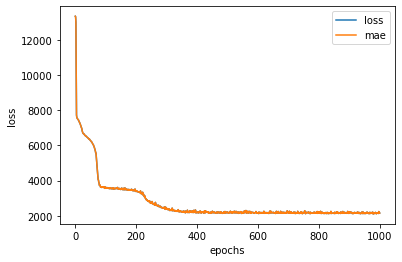

In [40]:
# PLOT HISTORY (also know as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question** how  long should you train  for?
It depends . Really.. It depends on the problem your're working on. However,many poeple hav asked this questions before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow compent you can add to your model to stop training once it stop improving a certain metrics

# Model_13

In [38]:
#set random seed
tf.random.set_seed(42)


#create model
model_13=tf.keras.Sequential([
    Dense(units=10,activation="relu"),
    Dense(units=5,activation="relu"),
    Dense(units=12,activation="relu"),  
    Dense(units=1)
])


#compile model
model_13.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"]
                        
)


#fit model
model_13.fit(X_train,
            y_train,
            epochs=1000
)

Epoch 1/1000
34/34 [==============================] - 1s 4ms/step - loss: 13359.1367 - mae: 13359.1367
Epoch 2/1000
34/34 [==============================] - 0s 4ms/step - loss: 13351.0107 - mae: 13351.0107
Epoch 3/1000
34/34 [==============================] - 0s 3ms/step - loss: 13333.7246 - mae: 13333.7246
Epoch 4/1000
34/34 [==============================] - 0s 3ms/step - loss: 13290.9004 - mae: 13290.9004
Epoch 5/1000
34/34 [==============================] - 0s 3ms/step - loss: 13206.2217 - mae: 13206.2217
Epoch 6/1000
34/34 [==============================] - 0s 4ms/step - loss: 13048.4785 - mae: 13048.4785
Epoch 7/1000
34/34 [==============================] - 0s 3ms/step - loss: 12785.7549 - mae: 12785.7549
Epoch 8/1000
34/34 [==============================] - 0s 3ms/step - loss: 12371.9619 - mae: 12371.9619
Epoch 9/1000
34/34 [==============================] - 0s 3ms/step - loss: 11756.6162 - mae: 11756.6162
Epoch 10/1000
34/34 [==============================] - 0s 3ms/step - loss

34/34 [==============================] - 0s 3ms/step - loss: 3621.4521 - mae: 3621.4521
Epoch 161/1000
34/34 [==============================] - 0s 3ms/step - loss: 3615.6140 - mae: 3615.6140
Epoch 162/1000
34/34 [==============================] - 0s 4ms/step - loss: 3612.4895 - mae: 3612.4895
Epoch 163/1000
34/34 [==============================] - 0s 3ms/step - loss: 3615.4124 - mae: 3615.4124
Epoch 164/1000
34/34 [==============================] - 0s 2ms/step - loss: 3621.9153 - mae: 3621.9153
Epoch 165/1000
34/34 [==============================] - 0s 2ms/step - loss: 3613.1272 - mae: 3613.1272
Epoch 166/1000
34/34 [==============================] - 0s 2ms/step - loss: 3613.1731 - mae: 3613.1731
Epoch 167/1000
34/34 [==============================] - 0s 3ms/step - loss: 3609.5120 - mae: 3609.5120
Epoch 168/1000
34/34 [==============================] - 0s 3ms/step - loss: 3607.6909 - mae: 3607.6909
Epoch 169/1000
34/34 [==============================] - 0s 3ms/step - loss: 3606.5627 - 

34/34 [==============================] - 0s 2ms/step - loss: 3398.1125 - mae: 3398.1125
Epoch 319/1000
34/34 [==============================] - 0s 2ms/step - loss: 3398.0334 - mae: 3398.0334
Epoch 320/1000
34/34 [==============================] - 0s 2ms/step - loss: 3398.6113 - mae: 3398.6113
Epoch 321/1000
34/34 [==============================] - 0s 2ms/step - loss: 3400.0903 - mae: 3400.0903
Epoch 322/1000
34/34 [==============================] - 0s 2ms/step - loss: 3393.6877 - mae: 3393.6877
Epoch 323/1000
34/34 [==============================] - 0s 2ms/step - loss: 3388.6064 - mae: 3388.6064
Epoch 324/1000
34/34 [==============================] - 0s 2ms/step - loss: 3390.4329 - mae: 3390.4329
Epoch 325/1000
34/34 [==============================] - 0s 2ms/step - loss: 3386.3547 - mae: 3386.3547
Epoch 326/1000
34/34 [==============================] - 0s 2ms/step - loss: 3385.1123 - mae: 3385.1123
Epoch 327/1000
34/34 [==============================] - 0s 2ms/step - loss: 3389.8616 - 

34/34 [==============================] - 0s 2ms/step - loss: 3324.0754 - mae: 3324.0754
Epoch 477/1000
34/34 [==============================] - 0s 2ms/step - loss: 3319.4644 - mae: 3319.4644
Epoch 478/1000
34/34 [==============================] - 0s 2ms/step - loss: 3309.6357 - mae: 3309.6357
Epoch 479/1000
34/34 [==============================] - 0s 2ms/step - loss: 3308.9834 - mae: 3308.9834
Epoch 480/1000
34/34 [==============================] - 0s 2ms/step - loss: 3311.7488 - mae: 3311.7488
Epoch 481/1000
34/34 [==============================] - 0s 2ms/step - loss: 3307.4204 - mae: 3307.4204
Epoch 482/1000
34/34 [==============================] - 0s 2ms/step - loss: 3307.8667 - mae: 3307.8667
Epoch 483/1000
34/34 [==============================] - 0s 2ms/step - loss: 3313.9175 - mae: 3313.9175
Epoch 484/1000
34/34 [==============================] - 0s 3ms/step - loss: 3309.7307 - mae: 3309.7307
Epoch 485/1000
34/34 [==============================] - 0s 2ms/step - loss: 3320.8396 - 

34/34 [==============================] - 0s 3ms/step - loss: 3295.2083 - mae: 3295.2083
Epoch 635/1000
34/34 [==============================] - 0s 2ms/step - loss: 3294.1914 - mae: 3294.1914
Epoch 636/1000
34/34 [==============================] - 0s 1ms/step - loss: 3292.6836 - mae: 3292.6836
Epoch 637/1000
34/34 [==============================] - 0s 1ms/step - loss: 3294.2229 - mae: 3294.2229
Epoch 638/1000
34/34 [==============================] - 0s 2ms/step - loss: 3298.0359 - mae: 3298.0359
Epoch 639/1000
34/34 [==============================] - 0s 2ms/step - loss: 3294.5349 - mae: 3294.5349
Epoch 640/1000
34/34 [==============================] - 0s 2ms/step - loss: 3290.6653 - mae: 3290.6653
Epoch 641/1000
34/34 [==============================] - 0s 2ms/step - loss: 3294.3909 - mae: 3294.3909
Epoch 642/1000
34/34 [==============================] - 0s 2ms/step - loss: 3293.9434 - mae: 3293.9434
Epoch 643/1000
34/34 [==============================] - 0s 2ms/step - loss: 3298.0366 - 

34/34 [==============================] - 0s 3ms/step - loss: 3281.3857 - mae: 3281.3857
Epoch 793/1000
34/34 [==============================] - 0s 2ms/step - loss: 3274.1040 - mae: 3274.1040
Epoch 794/1000
34/34 [==============================] - 0s 2ms/step - loss: 3281.1914 - mae: 3281.1914
Epoch 795/1000
34/34 [==============================] - 0s 3ms/step - loss: 3276.7654 - mae: 3276.7654
Epoch 796/1000
34/34 [==============================] - 0s 2ms/step - loss: 3278.1750 - mae: 3278.1750
Epoch 797/1000
34/34 [==============================] - 0s 2ms/step - loss: 3278.5271 - mae: 3278.5271
Epoch 798/1000
34/34 [==============================] - 0s 2ms/step - loss: 3274.8438 - mae: 3274.8438
Epoch 799/1000
34/34 [==============================] - 0s 2ms/step - loss: 3278.1909 - mae: 3278.1909
Epoch 800/1000
34/34 [==============================] - 0s 2ms/step - loss: 3277.7009 - mae: 3277.7009
Epoch 801/1000
34/34 [==============================] - 0s 2ms/step - loss: 3286.4990 - 

34/34 [==============================] - 0s 2ms/step - loss: 3257.6350 - mae: 3257.6350
Epoch 951/1000
34/34 [==============================] - 0s 2ms/step - loss: 3257.6614 - mae: 3257.6614
Epoch 952/1000
34/34 [==============================] - 0s 2ms/step - loss: 3258.0051 - mae: 3258.0051
Epoch 953/1000
34/34 [==============================] - 0s 2ms/step - loss: 3263.4089 - mae: 3263.4089
Epoch 954/1000
34/34 [==============================] - 0s 2ms/step - loss: 3259.0642 - mae: 3259.0642
Epoch 955/1000
34/34 [==============================] - 0s 2ms/step - loss: 3254.6636 - mae: 3254.6636
Epoch 956/1000
34/34 [==============================] - 0s 2ms/step - loss: 3253.8176 - mae: 3253.8176
Epoch 957/1000
34/34 [==============================] - 0s 2ms/step - loss: 3271.0879 - mae: 3271.0879
Epoch 958/1000
34/34 [==============================] - 0s 2ms/step - loss: 3263.7617 - mae: 3263.7617
Epoch 959/1000
34/34 [==============================] - 0s 2ms/step - loss: 3258.6592 - 

In [39]:
model_13.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 2909.4226 - mae: 2909.4226


[2909.422607421875, 2909.422607421875]

In [ ]:
##################################################################

# Model_14

In [47]:
#set random seed
tf.random.set_seed(42)


#create model
model_14=tf.keras.Sequential([
    Dense(units=100,activation="relu"),
    Dense(units=200,activation="relu"),
    Dense(units=100,activation="relu"),  
    Dense(units=1)
])


#compile model
model_14.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"]
                        
)


#fit model
model_14.fit(X_train,
            y_train,
            epochs=600
)

Epoch 1/600
34/34 [==============================] - 1s 3ms/step - loss: 13267.9717 - mae: 13267.9717
Epoch 2/600
34/34 [==============================] - 0s 3ms/step - loss: 12153.3691 - mae: 12153.3691
Epoch 3/600
34/34 [==============================] - 0s 3ms/step - loss: 8244.2285 - mae: 8244.2285
Epoch 4/600
34/34 [==============================] - 0s 3ms/step - loss: 7477.8750 - mae: 7477.8750
Epoch 5/600
34/34 [==============================] - 0s 3ms/step - loss: 7365.0908 - mae: 7365.0908
Epoch 6/600
34/34 [==============================] - 0s 3ms/step - loss: 7287.3872 - mae: 7287.3872
Epoch 7/600
34/34 [==============================] - 0s 3ms/step - loss: 7193.7441 - mae: 7193.7441
Epoch 8/600
34/34 [==============================] - 0s 3ms/step - loss: 7094.9966 - mae: 7094.9966
Epoch 9/600
34/34 [==============================] - 0s 3ms/step - loss: 6996.4756 - mae: 6996.4756
Epoch 10/600
34/34 [==============================] - 0s 3ms/step - loss: 6891.7349 - mae: 6891.

34/34 [==============================] - 0s 3ms/step - loss: 2288.2576 - mae: 2288.2576
Epoch 163/600
34/34 [==============================] - 0s 3ms/step - loss: 2277.6479 - mae: 2277.6479
Epoch 164/600
34/34 [==============================] - 0s 3ms/step - loss: 2278.1418 - mae: 2278.1418
Epoch 165/600
34/34 [==============================] - 0s 3ms/step - loss: 2257.0771 - mae: 2257.0771
Epoch 166/600
34/34 [==============================] - 0s 3ms/step - loss: 2272.4885 - mae: 2272.4885
Epoch 167/600
34/34 [==============================] - 0s 3ms/step - loss: 2249.1111 - mae: 2249.1111
Epoch 168/600
34/34 [==============================] - 0s 3ms/step - loss: 2274.3169 - mae: 2274.3169
Epoch 169/600
34/34 [==============================] - 0s 3ms/step - loss: 2254.0061 - mae: 2254.0061
Epoch 170/600
34/34 [==============================] - 0s 3ms/step - loss: 2238.3630 - mae: 2238.3630
Epoch 171/600
34/34 [==============================] - 0s 3ms/step - loss: 2264.3286 - mae: 2264

34/34 [==============================] - 0s 3ms/step - loss: 2026.7566 - mae: 2026.7566
Epoch 323/600
34/34 [==============================] - 0s 3ms/step - loss: 2045.5869 - mae: 2045.5869
Epoch 324/600
34/34 [==============================] - 0s 3ms/step - loss: 2045.6836 - mae: 2045.6836
Epoch 325/600
34/34 [==============================] - 0s 3ms/step - loss: 2014.4736 - mae: 2014.4736
Epoch 326/600
34/34 [==============================] - 0s 3ms/step - loss: 2016.9161 - mae: 2016.9161
Epoch 327/600
34/34 [==============================] - 0s 3ms/step - loss: 2039.5834 - mae: 2039.5834
Epoch 328/600
34/34 [==============================] - 0s 3ms/step - loss: 2000.9979 - mae: 2000.9979
Epoch 329/600
34/34 [==============================] - 0s 4ms/step - loss: 2006.1342 - mae: 2006.1342
Epoch 330/600
34/34 [==============================] - 0s 3ms/step - loss: 2019.6511 - mae: 2019.6511
Epoch 331/600
34/34 [==============================] - 0s 3ms/step - loss: 2024.2150 - mae: 2024

34/34 [==============================] - 0s 3ms/step - loss: 1968.6427 - mae: 1968.6427
Epoch 483/600
34/34 [==============================] - 0s 3ms/step - loss: 1965.4463 - mae: 1965.4463
Epoch 484/600
34/34 [==============================] - 0s 3ms/step - loss: 1985.0378 - mae: 1985.0378
Epoch 485/600
34/34 [==============================] - 0s 4ms/step - loss: 1965.0458 - mae: 1965.0458
Epoch 486/600
34/34 [==============================] - 0s 4ms/step - loss: 2008.7626 - mae: 2008.7626
Epoch 487/600
34/34 [==============================] - 0s 3ms/step - loss: 1986.1053 - mae: 1986.1053
Epoch 488/600
34/34 [==============================] - 0s 4ms/step - loss: 1992.0997 - mae: 1992.0997
Epoch 489/600
34/34 [==============================] - 0s 3ms/step - loss: 1974.7411 - mae: 1974.7411
Epoch 490/600
34/34 [==============================] - 0s 3ms/step - loss: 1976.1145 - mae: 1976.1145
Epoch 491/600
34/34 [==============================] - 0s 3ms/step - loss: 1971.4126 - mae: 1971

In [48]:
model_14.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1786.5383 - mae: 1786.5383


[1786.538330078125, 1786.538330078125]

# Model_15

In [51]:
#set random seed
tf.random.set_seed(42)


#create model
model_15=tf.keras.Sequential([
    Dense(units=50,activation="relu"),
    Dense(units=50,activation="relu"),
    Dense(units=20,activation="relu"),
    
    Dense(units=1)
])


#compile model
model_15.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"]
                        
)


#fit model
model_15.fit(X_train,
            y_train,
            epochs=600
)

Epoch 1/600
34/34 [==============================] - 1s 3ms/step - loss: 13328.0547 - mae: 13328.0547
Epoch 2/600
34/34 [==============================] - 0s 3ms/step - loss: 13260.2354 - mae: 13260.2354
Epoch 3/600
34/34 [==============================] - 0s 3ms/step - loss: 13037.2676 - mae: 13037.2676
Epoch 4/600
34/34 [==============================] - 0s 2ms/step - loss: 12354.8643 - mae: 12354.8643
Epoch 5/600
34/34 [==============================] - 0s 2ms/step - loss: 10706.4121 - mae: 10706.4121
Epoch 6/600
34/34 [==============================] - 0s 3ms/step - loss: 8394.3145 - mae: 8394.3145
Epoch 7/600
34/34 [==============================] - 0s 3ms/step - loss: 7465.1646 - mae: 7465.1646
Epoch 8/600
34/34 [==============================] - 0s 2ms/step - loss: 7427.9858 - mae: 7427.9858
Epoch 9/600
34/34 [==============================] - 0s 3ms/step - loss: 7398.3081 - mae: 7398.3081
Epoch 10/600
34/34 [==============================] - 0s 3ms/step - loss: 7370.6030 - mae:

34/34 [==============================] - 0s 2ms/step - loss: 3663.4478 - mae: 3663.4478
Epoch 83/600
34/34 [==============================] - 0s 2ms/step - loss: 3647.8345 - mae: 3647.8345
Epoch 84/600
34/34 [==============================] - 0s 2ms/step - loss: 3642.7712 - mae: 3642.7712
Epoch 85/600
34/34 [==============================] - 0s 2ms/step - loss: 3622.1135 - mae: 3622.1135
Epoch 86/600
34/34 [==============================] - 0s 2ms/step - loss: 3611.3486 - mae: 3611.3486
Epoch 87/600
34/34 [==============================] - 0s 2ms/step - loss: 3601.3601 - mae: 3601.3601
Epoch 88/600
34/34 [==============================] - 0s 2ms/step - loss: 3593.1433 - mae: 3593.1433
Epoch 89/600
34/34 [==============================] - 0s 2ms/step - loss: 3585.6326 - mae: 3585.6326
Epoch 90/600
34/34 [==============================] - 0s 2ms/step - loss: 3582.8088 - mae: 3582.8088
Epoch 91/600
34/34 [==============================] - 0s 2ms/step - loss: 3586.1116 - mae: 3586.1116
Epo

34/34 [==============================] - 0s 2ms/step - loss: 2968.0654 - mae: 2968.0654
Epoch 243/600
34/34 [==============================] - 0s 2ms/step - loss: 2969.3760 - mae: 2969.3760
Epoch 244/600
34/34 [==============================] - 0s 2ms/step - loss: 2969.7285 - mae: 2969.7285
Epoch 245/600
34/34 [==============================] - 0s 2ms/step - loss: 2963.6453 - mae: 2963.6453
Epoch 246/600
34/34 [==============================] - 0s 2ms/step - loss: 2954.4697 - mae: 2954.4697
Epoch 247/600
34/34 [==============================] - 0s 2ms/step - loss: 2974.0222 - mae: 2974.0222
Epoch 248/600
34/34 [==============================] - 0s 2ms/step - loss: 2955.6194 - mae: 2955.6194
Epoch 249/600
34/34 [==============================] - 0s 2ms/step - loss: 2954.6836 - mae: 2954.6836
Epoch 250/600
34/34 [==============================] - 0s 2ms/step - loss: 2956.3245 - mae: 2956.3245
Epoch 251/600
34/34 [==============================] - 0s 2ms/step - loss: 2946.4868 - mae: 2946

34/34 [==============================] - 0s 2ms/step - loss: 2618.0940 - mae: 2618.0940
Epoch 403/600
34/34 [==============================] - 0s 2ms/step - loss: 2625.4365 - mae: 2625.4365
Epoch 404/600
34/34 [==============================] - 0s 2ms/step - loss: 2622.9758 - mae: 2622.9758
Epoch 405/600
34/34 [==============================] - 0s 2ms/step - loss: 2613.2134 - mae: 2613.2134
Epoch 406/600
34/34 [==============================] - 0s 2ms/step - loss: 2610.6086 - mae: 2610.6086
Epoch 407/600
34/34 [==============================] - 0s 2ms/step - loss: 2605.8506 - mae: 2605.8506
Epoch 408/600
34/34 [==============================] - 0s 2ms/step - loss: 2610.2588 - mae: 2610.2588
Epoch 409/600
34/34 [==============================] - 0s 2ms/step - loss: 2612.2583 - mae: 2612.2583
Epoch 410/600
34/34 [==============================] - 0s 2ms/step - loss: 2617.8003 - mae: 2617.8003
Epoch 411/600
34/34 [==============================] - 0s 2ms/step - loss: 2610.6887 - mae: 2610

34/34 [==============================] - 0s 2ms/step - loss: 2326.1765 - mae: 2326.1765
Epoch 563/600
34/34 [==============================] - 0s 2ms/step - loss: 2331.3284 - mae: 2331.3284
Epoch 564/600
34/34 [==============================] - 0s 2ms/step - loss: 2322.5842 - mae: 2322.5842
Epoch 565/600
34/34 [==============================] - 0s 2ms/step - loss: 2319.4478 - mae: 2319.4478
Epoch 566/600
34/34 [==============================] - 0s 2ms/step - loss: 2332.2712 - mae: 2332.2712
Epoch 567/600
34/34 [==============================] - 0s 2ms/step - loss: 2331.8838 - mae: 2331.8838
Epoch 568/600
34/34 [==============================] - 0s 2ms/step - loss: 2319.5532 - mae: 2319.5532
Epoch 569/600
34/34 [==============================] - 0s 2ms/step - loss: 2313.8289 - mae: 2313.8289
Epoch 570/600
34/34 [==============================] - 0s 2ms/step - loss: 2328.9980 - mae: 2328.9980
Epoch 571/600
34/34 [==============================] - 0s 2ms/step - loss: 2307.7012 - mae: 2307

In [52]:
model_15.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2031.2174 - mae: 2031.2174


[2031.2174072265625, 2031.2174072265625]

# Model_17

In [55]:
#set random seed
tf.random.set_seed(42)


#create model
model_17=tf.keras.Sequential([
    Dense(units=10,activation="relu"),
    Dense(units=10,activation="relu"),
    Dense(units=15,activation="relu"), 
    Dense(units=5,activation="relu"),
    Dense(units=1)
])


#compile model
model_17.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"]
                        
)


#fit model
model_17.fit(X_train,
            y_train,
            epochs=500
)

Epoch 1/1000
34/34 [==============================] - 1s 3ms/step - loss: 13346.2041 - mae: 13346.2041
Epoch 2/1000
34/34 [==============================] - 0s 2ms/step - loss: 13346.0381 - mae: 13346.0381
Epoch 3/1000
34/34 [==============================] - 0s 3ms/step - loss: 13346.0059 - mae: 13346.0059
Epoch 4/1000
34/34 [==============================] - 0s 2ms/step - loss: 13345.9707 - mae: 13345.9707
Epoch 5/1000
34/34 [==============================] - 0s 3ms/step - loss: 13345.9375 - mae: 13345.9375
Epoch 6/1000
34/34 [==============================] - 0s 3ms/step - loss: 13345.9023 - mae: 13345.9023
Epoch 7/1000
34/34 [==============================] - 0s 3ms/step - loss: 13345.8682 - mae: 13345.8682
Epoch 8/1000
34/34 [==============================] - 0s 3ms/step - loss: 13345.8330 - mae: 13345.8330
Epoch 9/1000
34/34 [==============================] - 0s 3ms/step - loss: 13345.7998 - mae: 13345.7998
Epoch 10/1000
34/34 [==============================] - 0s 3ms/step - loss

34/34 [==============================] - 0s 2ms/step - loss: 13340.7695 - mae: 13340.7695
Epoch 158/1000
34/34 [==============================] - 0s 2ms/step - loss: 13340.7354 - mae: 13340.7354
Epoch 159/1000
34/34 [==============================] - 0s 2ms/step - loss: 13340.7012 - mae: 13340.7012
Epoch 160/1000
34/34 [==============================] - 0s 2ms/step - loss: 13340.6680 - mae: 13340.6680
Epoch 161/1000
34/34 [==============================] - 0s 2ms/step - loss: 13340.6348 - mae: 13340.6348
Epoch 162/1000
34/34 [==============================] - 0s 2ms/step - loss: 13340.6006 - mae: 13340.6006
Epoch 163/1000
34/34 [==============================] - 0s 2ms/step - loss: 13340.5645 - mae: 13340.5645
Epoch 164/1000
34/34 [==============================] - 0s 3ms/step - loss: 13340.5322 - mae: 13340.5322
Epoch 165/1000
34/34 [==============================] - 0s 2ms/step - loss: 13340.5000 - mae: 13340.5000
Epoch 166/1000
34/34 [==============================] - 0s 3ms/step - 

34/34 [==============================] - 0s 2ms/step - loss: 13335.4648 - mae: 13335.4648
Epoch 314/1000
34/34 [==============================] - 0s 2ms/step - loss: 13335.4297 - mae: 13335.4297
Epoch 315/1000
34/34 [==============================] - 0s 2ms/step - loss: 13335.3984 - mae: 13335.3984
Epoch 316/1000
34/34 [==============================] - 0s 2ms/step - loss: 13335.3623 - mae: 13335.3623
Epoch 317/1000
34/34 [==============================] - 0s 2ms/step - loss: 13335.3291 - mae: 13335.3291
Epoch 318/1000
34/34 [==============================] - 0s 2ms/step - loss: 13335.2939 - mae: 13335.2939
Epoch 319/1000
34/34 [==============================] - 0s 2ms/step - loss: 13335.2607 - mae: 13335.2607
Epoch 320/1000
34/34 [==============================] - 0s 2ms/step - loss: 13335.2256 - mae: 13335.2256
Epoch 321/1000
34/34 [==============================] - 0s 2ms/step - loss: 13335.1924 - mae: 13335.1924
Epoch 322/1000
34/34 [==============================] - 0s 2ms/step - 

34/34 [==============================] - 0s 2ms/step - loss: 13330.1582 - mae: 13330.1582
Epoch 470/1000
34/34 [==============================] - 0s 2ms/step - loss: 13330.1230 - mae: 13330.1230
Epoch 471/1000
34/34 [==============================] - 0s 2ms/step - loss: 13330.0908 - mae: 13330.0908
Epoch 472/1000
34/34 [==============================] - 0s 2ms/step - loss: 13330.0576 - mae: 13330.0576
Epoch 473/1000
34/34 [==============================] - 0s 2ms/step - loss: 13330.0234 - mae: 13330.0234
Epoch 474/1000
34/34 [==============================] - 0s 2ms/step - loss: 13329.9873 - mae: 13329.9873
Epoch 475/1000
34/34 [==============================] - 0s 2ms/step - loss: 13329.9531 - mae: 13329.9531
Epoch 476/1000
34/34 [==============================] - 0s 2ms/step - loss: 13329.9199 - mae: 13329.9199
Epoch 477/1000
34/34 [==============================] - 0s 2ms/step - loss: 13329.8867 - mae: 13329.8867
Epoch 478/1000
34/34 [==============================] - 0s 2ms/step - 

34/34 [==============================] - 0s 2ms/step - loss: 13324.8574 - mae: 13324.8574
Epoch 626/1000
34/34 [==============================] - 0s 2ms/step - loss: 13324.8242 - mae: 13324.8242
Epoch 627/1000
34/34 [==============================] - 0s 2ms/step - loss: 13324.7891 - mae: 13324.7891
Epoch 628/1000
34/34 [==============================] - 0s 2ms/step - loss: 13324.7559 - mae: 13324.7559
Epoch 629/1000
34/34 [==============================] - 0s 2ms/step - loss: 13324.7227 - mae: 13324.7227
Epoch 630/1000
34/34 [==============================] - 0s 2ms/step - loss: 13324.6895 - mae: 13324.6895
Epoch 631/1000
34/34 [==============================] - 0s 2ms/step - loss: 13324.6543 - mae: 13324.6543
Epoch 632/1000
34/34 [==============================] - 0s 2ms/step - loss: 13324.6191 - mae: 13324.6191
Epoch 633/1000
34/34 [==============================] - 0s 2ms/step - loss: 13324.5850 - mae: 13324.5850
Epoch 634/1000
34/34 [==============================] - 0s 2ms/step - 

34/34 [==============================] - 0s 2ms/step - loss: 13319.5586 - mae: 13319.5586
Epoch 782/1000
34/34 [==============================] - 0s 2ms/step - loss: 13319.5225 - mae: 13319.5225
Epoch 783/1000
34/34 [==============================] - 0s 2ms/step - loss: 13319.4863 - mae: 13319.4863
Epoch 784/1000
34/34 [==============================] - 0s 2ms/step - loss: 13319.4531 - mae: 13319.4531
Epoch 785/1000
34/34 [==============================] - 0s 2ms/step - loss: 13319.4219 - mae: 13319.4219
Epoch 786/1000
34/34 [==============================] - 0s 2ms/step - loss: 13319.3887 - mae: 13319.3887
Epoch 787/1000
34/34 [==============================] - 0s 2ms/step - loss: 13319.3516 - mae: 13319.3516
Epoch 788/1000
34/34 [==============================] - 0s 2ms/step - loss: 13319.3174 - mae: 13319.3174
Epoch 789/1000
34/34 [==============================] - 0s 2ms/step - loss: 13319.2842 - mae: 13319.2842
Epoch 790/1000
34/34 [==============================] - 0s 2ms/step - 

34/34 [==============================] - 0s 3ms/step - loss: 13314.2568 - mae: 13314.2568
Epoch 938/1000
34/34 [==============================] - 0s 2ms/step - loss: 13314.2236 - mae: 13314.2236
Epoch 939/1000
34/34 [==============================] - 0s 2ms/step - loss: 13314.1865 - mae: 13314.1865
Epoch 940/1000
34/34 [==============================] - 0s 2ms/step - loss: 13314.1533 - mae: 13314.1533
Epoch 941/1000
34/34 [==============================] - 0s 3ms/step - loss: 13314.1191 - mae: 13314.1191
Epoch 942/1000
34/34 [==============================] - 0s 2ms/step - loss: 13314.0859 - mae: 13314.0859
Epoch 943/1000
34/34 [==============================] - 0s 2ms/step - loss: 13314.0527 - mae: 13314.0527
Epoch 944/1000
34/34 [==============================] - 0s 3ms/step - loss: 13314.0166 - mae: 13314.0166
Epoch 945/1000
34/34 [==============================] - 0s 2ms/step - loss: 13313.9854 - mae: 13313.9854
Epoch 946/1000
34/34 [==============================] - 0s 2ms/step - 

In [56]:
model_17.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 12934.3242 - mae: 12934.3242


[12934.32421875, 12934.32421875]

# DATA PREPROCESSING

**Scaling of features**
>***Data Normalization & Standardization***

```Normalization is to change the values of numerical columns in the dataset to a [common scale], without distorting difference in the range  of values```

In [1]:
#lets re import out data and this time we preprocess it bet

# Kagle project (redo)

In [2]:
# importing  required Libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

2022-12-19 20:27:39.796317: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-19 20:27:39.796350: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-19 20:27:40.808952: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-19 20:27:40.809055: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-19 20:27:40.809073: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [3]:
#Read in data
df = pd.read_csv("../dataset/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
import matplotlib.pyplot as plt

NameError: name 'One_hot_encode' is not defined

 # Feature Scaling 
>> Scaling Types
* Scale(also referred to as normalization):
converting ll values from 0-1 while preserving the original distribution.
>Scikit-Learn Function >**MinMaxScaler**

* Standardization: Reamoves the mean and divides each value by the standard deviation.

>Scikit-Learn Function >**StandardScaler**



In terms of scaling value ,neural network tend to prefer normalization .

If you're not sure on which to use, you could try both and see which performs better

**To prepare our data , we can borroow a few classes from Scikit-Learn.**

In [5]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [6]:
 #create a column transformer
ct = make_column_transformer(
(MinMaxScaler(),["age","bmi","children"]), # turn all values in these columns between 0 and 1
(OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

#Creating X & y values
X=df.drop("charges",axis=1)
y=df["charges"]

#build our train and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42) 

#Fit  the column transformer to our training data
ct.fit(X_train)

#Transform training and test with normalization (MinMaxScaler) and One Hot Encoding 
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [7]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [8]:
X_train_normal






array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [9]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

**The data has been normalized and one hot encoded. Now lets build our Neural Network.**


In [10]:
#Build Neural Network
#set random seed
tf.random.set_seed(42)

#create model
insurance_model_2 = tf.keras.Sequential([
    Dense(units=10,activation="relu"),
    Dense(units=10,activation="relu"),
    Dense(units=15,activation="relu"),
    Dense(units=5,activation="relu"),
    Dense(units=1,activation="relu")
])

#compile model
insurance_model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"]
               
)

#Fit model
insurance_model_2.fit(
    X_train_normal,
    y_train,
    epochs=100
)


2022-12-19 20:27:58.603888: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-19 20:27:58.603945: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-19 20:27:58.603983: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mylar-pc): /proc/driver/nvidia/version does not exist


Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13345.7891 - mae: 13345.7891
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13343.8584 - mae: 13343.8584
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13338.0547 - mae: 13338.0547
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13321.2812 - mae: 13321.2812
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13276.7510 - mae: 13276.7510
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13177.3643 - mae: 13177.3643
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12979.2588 - mae: 12979.2588
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12611.0205 - mae: 12611.0205
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 11975.5254 - mae: 11975.5254
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11046.36

34/34 [==============================] - 0s 3ms/step - loss: 3290.8281 - mae: 3290.8281
Epoch 83/100
34/34 [==============================] - 0s 3ms/step - loss: 3288.6687 - mae: 3288.6687
Epoch 84/100
34/34 [==============================] - 0s 3ms/step - loss: 3287.1282 - mae: 3287.1282
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 3285.8188 - mae: 3285.8188
Epoch 86/100
34/34 [==============================] - 0s 3ms/step - loss: 3282.6863 - mae: 3282.6863
Epoch 87/100
34/34 [==============================] - 0s 3ms/step - loss: 3282.2195 - mae: 3282.2195
Epoch 88/100
34/34 [==============================] - 0s 3ms/step - loss: 3281.8340 - mae: 3281.8340
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 3279.7390 - mae: 3279.7390
Epoch 90/100
34/34 [==============================] - 0s 3ms/step - loss: 3277.9385 - mae: 3277.9385
Epoch 91/100
34/34 [==============================] - 0s 3ms/step - loss: 3275.5168 - mae: 3275.5168
Epo

In [11]:
insurance_model_2.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 2923.2227 - mae: 2923.2227


[2923.22265625, 2923.22265625]